# Edge Impulse MFCC Analysis for a KWS project
- Developed by Marcelo Rovai @ 24oct23

[![Open In Colab <](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Mjrovai/Arduino_Nicla_Vision/blob/main/KWS/KWS_MFCC_Analysis.ipynb)

## Install the Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import scipy.fftpack as fft
from scipy.fftpack import dct
from scipy.signal import spectrogram
import librosa
import librosa.display
import IPython.display

## Define the Plot functions

In [ ]:
def plot_time(audio, figsize=(5,3), title=''):
    plt.figure(figsize=figsize)
    plt.plot(audio, alpha=0.5, label='audio')
    plt.grid(True)
    plt.title(title+' Sample - Time Domain')
    plt.xlabel('time')
    plt.ylabel('amplitude')
    plt.show();

In [ ]:
def fft(data, sample_rate, figsize=(15,4),title = ''):

    N = sample_rate
    # Compute FFT
    yf = scipy.fftpack.fft(data)

    # Generate frequency bins
    xf = np.linspace(0.0, N//2, N//2)

    # Find the index of the maximum amplitude and its corresponding frequency
    start_bin = int(20 * (N // 2) / (N // 2))  # Corresponding bin for 20 Hz
    max_amplitude_idx = np.argmax(2.0/N * np.abs(yf[start_bin:N//2]))
    max_amplitude_frequency = xf[start_bin:][max_amplitude_idx]

    # Plot FFT (skipping the first 20 bins to start from 20 Hz)
    plt.figure(figsize=figsize)
    start_bin = int(20 * (N // 2) / (N // 2))  # Corresponding bin for 20 Hz
    plt.semilogx(xf[start_bin:], 2.0/N * np.abs(yf[start_bin:N//2]))

    # Add a point and label for the frequency with the maximum amplitude
    plt.scatter(max_amplitude_frequency, 2.0/N * np.abs(yf[start_bin:][max_amplitude_idx]), color='red')
    plt.annotate(f'Max Amp. @ {max_amplitude_frequency:.2f} Hz',
                 (max_amplitude_frequency, 2.0/N * np.abs(yf[start_bin:][max_amplitude_idx])),
                 textcoords="offset points",
                 xytext=(10,-10),
                 ha='left')

   # plt.semilogx(2.0/N * np.abs(yf[20:N//2]))
    plt.xlabel('frequency [Hz]')
    plt.ylabel('amp')
    plt.grid(True)
    plt.title(title+' sample - Frequency Components')
    return yf, max_amplitude_frequency
    plt.show();

In [ ]:
def plot_spectogram(audio, sample_rate, figsize=(10,5), title=''):
    epsilon = 1e-10 # Small constant to avoid log10(0)
    frequencies, times, Sxx = spectrogram(audio, sample_rate)
    plt.figure(figsize=figsize)
    plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx + epsilon), shading='gouraud')
    plt.title(title+' Sample - Spectogram')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar(label='Intensity [dB]')
    plt.show()

In [ ]:
def calc_plot_mfcc (audio, sample_rate, n_mfcc=13, figsize=(10,5), title=''):

    # Calculate MFCCs
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)

    # # Plotting the MFCCs
    plt.figure(figsize=figsize)
    librosa.display.specshow(mfccs,
                             x_axis='time',
                             sr=sample_rate,
                             cmap='coolwarm')
    plt.colorbar(format='%+2.0f dB')
    plt.ylabel('MFCC')
    plt.xlabel('time')
    plt.ylabel('MFCC Coefficients')
    plt.yticks(np.arange(0, 13, 1), [str(i+1) for i in range(13)])
    plt.title(title +' - Mel-frequency cepstral coefficients (MFCC)')
    plt.tight_layout()
    plt.show()

## Analizyng Audio raw sample

### Get the Raw Feature

Copy and past one of the `Raw features` of your project. For example a 1 second 'Yes'sampled @ 16KHz.

In [ ]:
yes = [-58, -51, 11, 44, 28, -25, -38, -12, 10, 28, 29, -12, -27, -8, 20, 40, 5, -38, -18, 33, 1, -5, 11, -12, -49, -1, 33, 10, -27, -17, -21, 6, 23, 14, -19, -5, 3, -11, 3, 12, -2, -19, 6, -6, -34, -26, 35, 33, -12, -42, -44, 15, 41, 21, -31, -33, 7, 27, -4, 17, 22, -15, -29, 20, 44, 4, -8, -6, 13, 18, 34, -23, -19, 29, 22, -10, 5, 25, -14, -22, 0, 13, 12, 2, -31, -14, 33, 29, -19, -6, 16, -8, -26, 10, 10, 6, -6, 3, -7, -30, -4, 16, 1, 0, 27, -26, -62, 18, 75, 1, -49, -21, -2, 14, 59, 16, -70, -31, 48, 40, -24, -18, -4, -2, 18, 30, -31, -35, 31, 37, -10, -17, -23, -6, 5, 22, -6, -27, -14, 1, 7, -10, -28, -13, 31, 3, -46, -2, 31, -5, 10, 24, -18, -37, 15, 55, 19, 4, -17, -18, 16, 43, 2, -22, 24, 43, -28, -46, 35, 79, -2, -82, -29, 31, 29, 3, -28, -55, -10, 24, 8, 0, 4, -45, -41, 34, 42, -34, -66, -21, 41, 44, -14, -35, -14, 22, 27, 10, -7, 6, 29, -10, -42, 2, 46, 40, 1, -59, -56, 17, 76, 47, -47, -85, -29, 64, 52, -15, -45, -35, 11, 41, 13, -35, -25, 26, 18, 5, -14, -15, 19, 32, 2, -43, -14, 31, 30, -3, -23, -21, 16, 67, 38, -46, -69, 3, 75, 49, -27, -40, -10, 34, 53, 13, -46, -28, 30, 34, -5, -11, 1, -1, 7, -7, -26, -17, 37, 41, -20, -76, -25, 39, 46, 2, -44, -55, 1, 44, 4, -40, -27, 2, 5, -16, -19, -9, -11, -7, 1, -28, -37, -6, 41, 15, -36, -32, 22, 48, 22, -11, -27, 4, 56, 29, -36, -31, 9, 43, 32, -10, -37, 8, 31, 6, -6, -17, -16, 15, 29, 8, -14, -14, -14, 9, 29, -4, -14, 15, 15, -12, 1, 0, 0, 0, 7, -6, -12, -4, -6, -4, 9, 13, 2, -7, -12, -3, 16, 20, 5, -13, -15, -4, 18, 17, 7, -8, -11, 5, 20, 21, -7, -30, -12, 16, -13, -32, -17, 12, 6, 0, 1, -13, -5, 18, 17, -13, -12, 12, 9, 5, -2, -5, -9, 1, 11, 0, -17, -14, -1, 3, -1, -6, -15, -9, 11, 6, -17, -17, 16, 24, 1, -3, 4, 2, 15, 15, 7, 2, 15, 10, 1, -3, 18, 15, 0, -5, 5, 9, 4, 11, 6, -7, -14, 3, 6, -3, -17, -13, -14, -8, 6, 0, -21, 4, 19, -5, -25, -1, 2, -4, 0, -2, -19, -14, 13, 0, -23, -1, 15, -15, -25, 1, 4, -11, 3, 15, 0, -7, 4, 15, 0, -7, -9, -2, 14, 15, -2, -14, 8, 31, 16, -11, -3, 10, 0, 0, 3, -4, -17, -10, 0, 0, -6, -17, -15, 0, 13, 0, -5, 7, 4, -12, 1, 16, 11, 0, -6, -3, 9, 10, -6, 0, 15, 4, -8, -3, 5, 5, 11, 9, 4, 0, 5, 6, 7, 5, -3, -9, -4, 0, 5, -4, -11, -5, -4, -3, -2, -13, -28, -5, 27, 23, -8, -15, 11, 17, 9, 3, -2, 0, 19, 23, 7, -5, 2, 3, -1, -1, -3, -6, -6, -13, -8, 0, 0, -2, -6, -12, -16, -1, 6, -6, -14, -7, 1, 1, -1, -11, -6, 7, 9, 3, -11, -17, 1, 17, 10, -4, -9, -8, 4, 11, 7, -1, 2, 10, 7, 6, 9, 10, 0, 1, 11, 4, -8, -7, 10, 0, -14, -12, -2, 5, 13, -4, -19, -4, 18, 25, 11, -6, -10, 16, 29, 5, -4, 8, 12, 0, -3, -3, -3, 0, -2, -12, -14, -4, -6, -12, -20, -15, -4, -2, -16, -30, -10, 15, 20, -9, -29, -12, 19, 25, 7, -7, -10, -2, 18, 19, 1, -5, 0, 24, 22, 9, 1, -3, 11, 26, 7, -17, -17, -9, -10, -2, 0, -21, -36, -19, -5, -11, -17, -28, -23, 0, 9, -15, -23, 2, 19, 12, -7, -10, 8, 27, 19, 9, 9, 10, 14, 11, 4, -1, 1, 5, 5, -5, -2, 13, 18, 1, -12, 5, 20, 15, -10, -16, 1, 24, 19, -13, -10, 19, 34, 16, -2, -10, -5, 3, 4, 0, -3, -7, -8, -1, 4, 2, -7, -15, -8, 3, 5, -3, -7, -8, 2, 3, -1, 0, -3, -19, -14, 9, 19, -2, -18, -12, 0, 9, 10, -8, -21, -1, 17, 7, 3, 8, 6, 2, 16, 27, 2, -12, 0, 14, 12, -1, -14, -16, 1, 18, -2, -32, -26, 2, 10, -3, -26, -25, -8, 9, 14, -2, -23, -8, 7, 5, -7, -13, -8, 3, -1, -12, -3, 5, -2, -14, -3, 13, 5, -2, -9, -5, 5, 16, 4, -7, -5, 12, 12, 2, -7, -14, -6, 3, 0, -16, -26, -17, 2, 9, 4, -8, -14, -5, 17, 27, 18, -4, -8, 14, 35, 31, 5, -10, -3, 23, 36, 18, -8, -8, 11, 25, 20, 0, -11, -2, 13, 13, -3, -21, -17, 7, 17, 5, -4, -4, -4, 1, 8, 0, -8, -10, -2, 0, 4, 4, -9, -11, -7, 0, 6, 9, 0, -13, -4, 8, 9, 7, -1, -6, 4, 12, 8, 0, -5, -5, 4, 9, 3, -5, -9, -4, 2, 2, -7, -15, -6, 7, 5, -9, -8, 0, 1, 5, 6, -5, -17, -11, -1, -5, -17, -16, -9, 0, 0, -13, -27, -9, 9, 5, -11, -17, -7, -2, -3, 0, 4, 1, -5, -4, 0, 9, 13, -1, -9, 5, 22, 17, 1, -4, 4, 13, 17, 9, -4, -7, 10, 20, 9, -8, -11, 0, 10, 9, 1, -8, -3, 3, 4, -3, -8, -6, -3, 2, 5, 1, -2, 0, 1, -3, -5, -1, 4, 3, 2, 4, 3, -2, -3, 4, 9, 8, 1, -1, 0, 2, -1, -1, 0, 0, -6, -7, -4, -4, -6, -4, -1, 2, 8, 3, -3, 1, 10, 9, 4, 2, 1, 7, 13, 8, 0, 1, 12, 14, 12, -1, -8, -5, 0, 2, -3, -14, -16, -7, 0, -6, -16, -18, -11, -3, -5, -8, -6, -5, -6, -5, -7, -8, -7, -9, -9, -2, 7, 9, 4, 0, 4, 12, 14, 6, 0, 4, 16, 22, 14, 0, -2, 10, 15, 7, -3, -11, -10, -1, 3, 0, -6, -3, 2, 9, 13, 5, -3, -4, 1, 0, -6, -7, -8, -11, -8, 1, 6, -1, -8, -10, -9, 0, 6, -1, -15, -15, -4, 7, 8, -4, -16, -12, 4, 10, 2, -6, -2, 7, 10, 0, -7, -10, -2, 4, 6, -1, -6, -7, -3, 0, -1, -5, -4, -4, 1, 2, 1, 4, 9, 9, 3, 1, 0, 3, 0, -1, -4, -1, 6, 8, 3, 1, 3, 8, 9, 5, 3, 4, 8, 12, 12, 11, 14, 14, 9, 7, 7, 8, 10, 7, -1, -4, -3, -2, -2, 0, -2, -4, -4, 0, 2, 1, -1, 2, 8, 6, 2, -2, -5, -1, 6, 8, 2, -3, -1, 3, 3, 0, -1, -5, -7, -6, -5, -5, -7, -6, -3, -5, -4, -7, -12, -14, -8, -6, -9, -8, -5, -5, -7, -8, -7, -8, -9, -7, -8, -5, -3, -2, -2, 1, 6, 2, -3, -5, 0, 3, 3, -2, -5, -2, 4, 5, 1, 2, 6, 5, 4, 5, 2, 1, 0, -2, -4, -3, 0, 3, 2, 2, 1, 0, 0, 0, -5, -8, -8, -6, -2, -2, -2, -4, -1, 1, 2, -2, -4, -6, -5, -2, 2, 3, -2, -6, -5, -3, 0, -1, -1, -2, 0, 0, 0, 3, 7, 7, 7, 12, 13, 11, 11, 10, 9, 12, 15, 14, 10, 12, 15, 14, 9, 7, 6, 9, 11, 7, 3, -1, -1, -6, -8, -9, -7, -3, -3, -2, -1, -2, -1, -1, -1, -4, -6, -5, -5, -5, -3, -1, -1, 0, 0, 1, 4, 3, 3, 5, 5, 6, 7, 3, 0, -3, -3, -6, -5, -4, -4, -6, -5, -4, -5, -6, -7, -7, -8, -9, -10, -8, -7, -2, 0, 2, 4, 5, 6, 4, 3, -1, -2, -4, -4, -3, -6, -3, 2, 1, 0, 1, 2, 4, 5, 4, 0, -2, -2, -3, -6, -5, 0, 4, 7, 6, 4, 2, 1, 1, -1, -5, -4, -2, -1, 0, 1, 3, 4, 4, 4, 2, -1, -4, -5, -6, -7, -8, -8, -5, 0, -2, -6, -3, -1, -2, -3, -2, 0, 0, -1, -4, -2, -1, -1, -2, 0, 1, 7, 10, 9, 7, 7, 6, 3, 4, 6, 6, 3, 2, 1, 6, 9, 6, 3, 2, 1, 2, 2, 3, 4, 1, 0, 2, 5, 6, 2, 0, 0, 3, 3, 2, 1, 4, 4, 0, -8, -3, 23, 49, 27, -13, -22, -16, -30, -36, -4, 24, 18, -19, -32, -16, -14, -37, -32, 7, 32, 8, -10, -1, 12, 9, -7, 2, 32, 34, 11, -1, 4, 10, 2, -5, -3, 6, 2, -14, -24, -17, -12, -17, -15, -10, -2, -3, -8, -7, -2, 2, 11, 15, 14, 6, -1, -7, -9, -11, -5, 5, 9, 4, 2, 0, -6, -15, -15, -3, 7, 6, -1, 2, 11, 4, -12, -13, -2, 9, 8, -2, -6, -1, 0, -5, -8, -2, 2, 0, -4, -1, -1, -3, -4, 0, 10, 15, 12, 8, 9, 12, 10, 5, 6, 13, 12, 3, -3, -4, -1, -2, -3, -1, 4, 5, -2, -10, -7, 3, 9, 7, 3, 0, 0, -4, -5, -9, -6, -6, -3, 3, 9, 6, 2, 0, -4, -6, -4, 2, 6, 3, -3, -4, 0, 3, 2, -1, -1, -1, 0, 0, -2, 0, 2, 5, 3, 1, 2, 4, 6, 6, 4, 6, 8, 10, 12, 9, 9, 10, 10, 8, 3, 4, 6, 5, 1, -1, 0, 0, -5, -11, -9, -9, -15, -20, -17, -15, -20, -24, -21, -15, -11, -13, -14, -11, -8, -12, -12, -8, -3, -1, 0, 3, 4, 0, -1, 1, 3, 5, 5, 7, 12, 13, 10, 8, 8, 10, 10, 8, 12, 17, 15, 9, 4, 3, 1, -3, -5, -1, 1, 0, 0, 1, 0, -1, -3, -5, -3, -3, -5, -4, 0, 3, -2, -7, -7, -7, -8, -9, -8, -5, -2, -1, -4, -6, -6, -8, -11, -10, -6, -2, 1, 0, -4, -8, -10, -8, -9, -8, -4, 1, 4, 3, 4, 4, 2, 3, 7, 6, 4, 2, 3, 6, 9, 7, 6, 7, 6, 3, 3, 6, 9, 10, 8, 9, 13, 15, 12, 9, 8, 8, 4, 2, 3, 3, 0, -1, -3, -2, 0, 4, 9, 9, 4, 2, 3, 0, -4, -6, -4, -4, -4, -4, -2, 0, 0, -2, -3, -2, -1, -1, -3, -7, -8, -7, -7, -5, -2, 0, 3, 5, 5, 4, 3, 1, 2, 3, 6, 7, 6, 2, 0, 1, 3, 2, 0, 0, 2, 3, 1, 1, 1, 0, -3, -1, 4, 6, 4, 3, 3, 1, 0, 0, 0, -1, -1, 1, 2, 0, -2, -2, -1, -1, -3, -2, 1, 3, 1, -3, -6, -6, -5, -8, -9, -10, -12, -14, -15, -10, -7, -8, -11, -11, -7, -6, -9, -9, -8, -8, -8, -8, -5, -5, -7, -10, -10, -8, -5, 0, 2, 2, -2, -8, -11, -6, -1, 3, 6, 8, 6, 0, -1, 1, 6, 7, 9, 8, 9, 10, 12, 15, 15, 13, 9, 6, 6, 7, 8, 11, 13, 10, 7, 4, 5, 5, 7, 10, 12, 8, 2, 0, -1, -1, 1, 2, 3, 2, 1, 3, 4, 7, 10, 12, 9, 5, 2, 1, -3, -5, -6, -6, -9, -13, -15, -12, -8, -6, -5, -3, -4, -6, -10, -7, -1, 2, 5, 8, 10, 9, 6, 3, 3, 3, 2, 0, 0, 0, 1, -1, -2, -2, -1, 0, -1, 1, 4, 3, 0, -1, 0, 0, -2, -4, -3, -3, -7, -10, -12, -13, -12, -12, -12, -12, -14, -12, -9, -8, -9, -8, -6, -2, 0, 0, 2, 2, 0, 0, 3, 5, 3, 1, 3, 5, 1, 1, 5, 8, 9, 6, 7, 12, 11, 6, 3, 2, 3, 1, -2, -3, -2, -2, -6, -8, -7, -5, -4, -3, -1, 1, 2, 2, 1, 0, -2, -2, -5, -5, -5, -1, 1, 4, 10, 12, 9, 4, 2, 2, 2, 2, 2, 4, 6, 4, 4, 6, 5, 4, 2, 2, 2, 2, 4, 7, 6, 2, 0, -2, -3, -1, -2, -3, -4, 0, 2, 2, 3, 4, 4, 5, 5, 4, 0, 0, 0, 4, 5, 3, 0, -4, -6, -8, -11, -13, -11, -8, -7, -5, -3, -5, -8, -9, -8, -7, -5, -4, -3, -3, -2, 0, 3, 6, 9, 8, 4, 3, 2, 2, 3, 3, 2, 1, 0, 0, 3, 5, 4, 1, 0, -1, -2, -3, -1, 1, 1, -2, -6, -6, -6, -3, -1, 0, -1, 0, 0, 0, -1, 0, -1, -2, -3, -3, -1, -1, 0, 1, 1, 0, -1, -1, -2, -4, -6, -4, -1, 1, 0, -1, 0, 2, 5, 6, 9, 11, 11, 6, 4, 4, 6, 10, 11, 12, 10, 8, 8, 6, 5, 5, 5, 4, 1, 0, 0, -1, -2, -3, -5, -7, -10, -10, -9, -8, -8, -8, -6, -5, -6, -6, -6, -5, -4, -4, -4, -2, 0, -1, -2, -1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 2, 2, 2, 2, 0, -2, -2, -1, 0, 0, 1, 2, 0, -1, 0, 0, -1, -2, 0, 4, 5, 3, 1, 1, 1, 0, 3, 5, 5, 4, 2, 3, 3, 4, 5, 7, 6, 2, -1, -2, -3, -4, -2, -2, -3, -6, -7, -6, -4, -4, -5, -4, -1, 2, 3, 5, 4, 5, 6, 5, 4, 4, 3, 2, 1, 0, -2, -3, -3, -3, -4, -3, 0, 0, 2, 2, 2, 1, 1, 2, 5, 7, 8, 7, 4, 0, -1, -3, -2, -2, 0, 1, 2, 0, -1, -2, -4, -6, -6, -6, -6, -5, -4, -3, 0, 3, 4, 6, 7, 4, 3, 2, 0, 0, 0, 0, -1, -1, -2, -3, -3, -3, -1, 0, -1, -1, -4, -6, -8, -8, -8, -10, -11, -11, -11, -9, -8, -6, -3, -4, -6, -8, -8, -9, -9, -7, -3, 0, 0, -2, -3, -3, -1, -2, -1, 0, 0, -1, -1, 0, 3, 4, 3, 3, 6, 10, 13, 13, 13, 12, 11, 7, 3, 3, 4, 5, 6, 7, 7, 7, 7, 7, 4, 3, 2, 2, 1, 2, 3, 2, 2, 4, 2, 0, -2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 3, 5, 7, 8, 10, 11, 9, 5, 2, 1, 2, 2, 2, 2, 2, 4, 6, 8, 8, 6, 5, 5, 5, 3, 1, 0, -4, -7, -8, -8, -7, -5, -7, -8, -10, -10, -11, -10, -10, -9, -8, -8, -6, -3, 0, 0, -1, -3, -5, -7, -7, -6, -7, -8, -10, -9, -10, -11, -11, -10, -10, -8, -6, -5, -5, -7, -7, -7, -4, -2, 0, 2, 5, 6, 9, 11, 11, 8, 4, 3, 3, 6, 8, 9, 7, 5, 6, 5, 5, 6, 6, 5, 4, 3, 3, 4, 1, -1, -3, -3, -3, -1, 0, -1, -4, -5, -5, -2, 1, 3, 2, 1, 0, -1, -1, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 1, 1, 3, 6, 7, 6, 4, 1, 0, 0, 1, 3, 4, 2, 0, 0, 1, 3, 4, 4, 3, 2, 3, 3, 5, 6, 6, 2, -1, -5, -5, -4, -2, -1, 0, 1, 1, 3, 2, -1, -2, -1, 0, 0, 0, 0, 1, 2, 2, 0, -2, -4, -6, -7, -8, -6, -5, -5, -5, -3, -2, -3, -3, 0, 3, 4, 4, 3, 1, 1, 0, -1, -2, -5, -8, -9, -7, -6, -6, -6, -6, -8, -8, -5, -1, 0, 0, -1, -1, 0, 1, 3, 4, 5, 6, 6, 6, 7, 6, 6, 5, 5, 5, 3, 0, -4, -7, -9, -10, -9, -8, -6, -7, -8, -7, -4, -3, -2, -1, 0, 1, 1, 1, 2, 3, 1, 0, 1, 3, 5, 4, 2, 4, 4, 4, 5, 6, 7, 8, 9, 14, 17, 16, 13, 10, 6, 3, 1, 0, -2, -5, -8, -10, -9, -7, -4, -1, 0, 0, 0, 0, 1, 1, 2, 5, 6, 4, 0, 0, 0, 1, 3, 2, -1, -5, -8, -7, -4, -3, -3, -5, -6, -6, -5, -4, -2, 0, 1, 1, 0, -3, -6, -7, -4, -1, 0, -1, -4, -6, -6, -3, -1, -1, -2, -3, -2, 0, 3, 5, 4, 2, 4, 5, 6, 5, 4, 3, 0, 0, 0, 1, 0, -1, -2, -2, 0, 0, 1, 2, 4, 7, 11, 11, 10, 11, 11, 14, 14, 14, 14, 13, 12, 11, 10, 6, 2, -2, -3, -4, -3, -3, -3, -5, -6, -6, -6, -7, -11, -14, -16, -16, -14, -12, -10, -9, -10, -10, -8, -8, -7, -6, -6, -6, -3, -3, -2, -2, -3, -5, -7, -5, -2, 0, 0, 1, 2, 1, -1, -2, -4, -5, -4, -4, -2, -1, -1, -2, -3, -3, -2, -2, -1, 0, 2, 6, 6, 5, 4, 1, -1, -1, 4, 9, 10, 8, 4, 0, 0, 0, 2, 2, 1, 1, 1, 3, 5, 4, 3, 3, 4, 3, 4, 3, 2, 3, 4, 6, 8, 8, 3, 1, 1, 4, 9, 11, 11, 8, 4, 4, 8, 13, 13, 12, 10, 9, 9, 9, 8, 6, 2, 0, 0, 0, 3, 3, 2, 0, -1, -1, -2, -2, -2, 0, 2, 1, 0, 0, -1, -2, -2, -4, -6, -7, -8, -7, -7, -5, -6, -9, -12, -15, -16, -16, -15, -12, -9, -6, -5, -6, -7, -7, -8, -7, -5, -6, -8, -8, -9, -11, -10, -7, -5, -5, -6, -7, -7, -8, -5, 1, 6, 8, 6, 3, 2, 3, 3, 4, 4, 1, -1, -2, -2, -2, -2, -2, -2, -3, -6, -9, -11, -10, -11, -13, -12, -9, -6, -3, 0, 2, 3, 3, 2, 4, 6, 7, 9, 10, 13, 15, 16, 17, 17, 14, 11, 8, 5, 4, 6, 7, 9, 8, 8, 9, 10, 10, 6, 4, 5, 9, 13, 13, 10, 6, 6, 5, 8, 10, 11, 13, 12, 11, 9, 8, 6, 6, 5, 2, 0, -2, -4, -4, -3, 0, 0, 2, 3, 4, 2, -1, -6, -8, -8, -5, -5, -6, -9, -14, -17, -19, -22, -23, -18, -14, -9, -11, -12, -12, -8, -4, 0, 2, 4, 4, 4, 4, 1, -1, -1, 0, 1, 1, 0, -2, -4, -6, -7, -5, -4, -5, -8, -12, -11, -9, -6, -4, -4, -4, -1, 1, 1, 0, -2, -4, -5, -5, -4, -2, 0, 0, 0, -2, -4, -3, 1, 8, 11, 10, 9, 6, 4, 6, 9, 13, 12, 10, 8, 4, 0, -1, -2, -1, -1, -1, 0, -1, 0, 0, 2, 5, 4, 5, 5, 5, 5, 6, 6, 8, 7, 3, 0, -1, 0, 0, 1, 1, 0, 0, 0, -2, -4, -5, -5, -4, -2, -1, 0, 2, 1, 3, 6, 12, 13, 12, 6, 2, -2, -2, 0, 1, 3, 2, 0, 0, 2, 2, 1, 1, 0, -1, -3, -4, -3, -4, -8, -11, -9, -6, 0, 0, 0, -1, 0, 3, 1, 0, 0, 0, -1, 0, 0, 0, 1, 0, 0, 0, 0, 0, -1, -4, -7, -6, -3, -2, -2, -2, -1, -4, -3, -1, 0, 0, -2, -7, -8, -10, -11, -12, -10, -7, -5, -4, -3, -3, -4, -5, -9, -9, -5, -1, 0, 1, 1, -1, -4, -5, -4, -1, 0, 0, 1, 0, 0, 3, 8, 11, 10, 10, 9, 11, 15, 20, 20, 18, 15, 14, 13, 11, 8, 9, 10, 10, 10, 12, 15, 13, 7, 5, 6, 6, 3, -1, -1, 3, 4, 2, -2, -5, -10, -12, -12, -6, -4, -7, -11, -13, -10, -8, -8, -11, -11, -12, -16, -23, -26, -23, -14, -7, -4, -6, -9, -13, -10, -4, 4, 8, 9, 8, 1, -5, -9, -6, -2, 0, 0, -1, -3, -3, -1, 0, 5, 6, 9, 10, 8, 4, 2, 7, 11, 16, 13, 5, -1, -5, -1, 2, 7, 10, 9, 6, 2, -2, -3, 0, 3, 7, 9, 10, 7, 5, 0, -5, -5, -3, 0, 1, -1, -7, -9, -7, -4, -3, -2, -1, 0, 0, 0, -2, -6, -7, -8, -4, 1, 5, 3, -2, -8, -8, 0, 6, 9, 4, -1, -8, -8, -4, 6, 19, 23, 19, 9, 1, -3, -3, 0, 3, 9, 7, 7, 3, 1, 1, 4, 7, 8, 11, 12, 14, 11, 9, 7, 5, 4, 4, 4, 7, 5, 0, -2, -4, -2, 4, 5, 6, 3, -1, -5, -6, -4, -3, -4, -7, -7, -5, -5, -7, -13, -14, -15, -16, -17, -17, -18, -16, -11, -6, -4, -7, -11, -16, -15, -13, -12, -10, -10, -7, -7, -4, -6, -7, -12, -14, -13, -11, -8, -9, -5, -2, 3, 4, 3, 1, 3, 0, 2, -2, 0, 3, 7, 10, 5, 6, 4, 7, 7, 4, 5, 8, 10, 9, 10, 7, 7, 3, 6, 9, 10, 13, 8, 11, 10, 11, 7, 2, 0, 2, 6, 10, 12, 13, 12, 10, 7, 10, 9, 15, 14, 17, 14, 14, 12, 8, 8, 6, 6, 9, 8, 9, 7, 6, 5, 2, -1, -3, -3, -1, -1, -3, -5, -5, -7, -6, -7, -7, -6, -6, -5, -4, -6, -9, -14, -17, -18, -20, -21, -20, -19, -14, -15, -13, -15, -13, -11, -13, -10, -10, -4, 0, 0, 1, 0, 0, 0, 1, 0, 5, 2, 0, -1, -4, -4, -6, -10, -9, -9, -6, 0, 2, 1, -1, -1, -2, 1, 2, 4, 4, 3, 3, 0, -1, -2, -2, 0, 3, 0, 0, 0, 5, 6, 10, 9, 9, 7, 5, 5, 7, 12, 18, 19, 12, 10, 1, 3, 3, 3, 7, 3, 3, 1, 0, -1, -4, -3, -3, -1, -1, -3, -6, -6, -9, -6, -6, -7, -6, -6, -5, -2, -4, -6, -6, -7, -6, -5, -3, 1, 6, 9, 10, 9, 9, 10, 12, 15, 8, 4, 0, 2, 4, 3, 2, 0, -3, -4, -3, 0, 3, 5, 3, 0, -1, -2, 0, 1, 0, 2, 4, 10, 15, 14, 10, 5, 3, 1, 3, 2, 4, 0, -3, -5, -4, -3, 0, 0, -1, 0, -5, -6, -5, -5, -5, -8, -13, -16, -14, -15, -16, -15, -15, -11, -10, -11, -10, -7, -7, -7, -8, -9, -1, -2, -1, -3, -1, 1, 1, 3, 4, 3, 0, -2, -2, -3, -1, -2, -6, -5, -6, 0, -1, 0, -3, 4, 12, 16, 14, 12, 10, 13, 12, 16, 17, 19, 17, 12, 9, 9, 9, 11, 8, 6, 7, 8, 9, 8, 5, 2, 1, 4, 9, 12, 9, 5, 2, 1, 2, 4, 0, -5, -11, -8, -6, -1, 0, 0, -2, -5, -11, -11, -12, -13, -10, -9, -4, -1, 0, -2, -7, -7, -8, -9, -10, -7, -7, -9, -9, -8, -7, -8, -11, -7, -3, -3, -7, -5, -4, -5, -7, -6, -2, 3, 2, 1, 3, 4, 7, 12, 11, 9, 6, 3, 2, -3, -3, -4, -1, -10, -12, -6, -3, 2, 2, 2, 6, 2, 3, 4, 4, 5, 4, 8, 7, 8, 7, 9, 7, 10, 3, 5, 1, 0, 2, 8, 7, 10, 8, 1, 2, 0, 1, 2, 3, 2, 2, 0, 2, -1, -1, -1, 0, 5, 6, 6, 6, 0, -1, -1, 0, 7, 7, 6, 4, 6, 6, 4, 5, 8, 7, 3, -1, -1, -3, -7, -8, -9, -10, -8, -8, -7, -14, -17, -17, -18, -16, -15, -16, -14, -21, -20, -20, -22, -15, -12, -7, -11, -14, -14, -8, -10, -11, -12, -8, -9, -6, 0, 0, -1, -1, 3, 6, 9, 5, 11, 15, 16, 18, 18, 19, 21, 16, 19, 21, 22, 18, 21, 20, 20, 19, 19, 14, 11, 10, 7, 4, 0, -4, -4, -4, -3, -2, -2, -9, -9, 0, 0, 2, 3, 2, 2, 4, 4, 12, 12, 13, 13, 17, 17, 18, 16, 14, 7, 4, 0, -3, -4, -8, -8, -15, -15, -17, -16, -23, -25, -21, -20, -18, -17, -15, -14, -16, -17, -15, -6, -2, 0, -3, 1, 3, 6, 10, 16, 13, 9, 9, 8, 4, 3, 0, -4, -7, -11, -15, -19, -31, -34, -39, -44, -45, -45, -49, -46, -52, -46, -40, -34, -27, -21, -17, -12, -4, 2, 21, 31, 38, 49, 64, 64, 71, 78, 76, 75, 75, 72, 68, 61, 51, 39, 25, 17, 10, 4, -3, -12, -23, -26, -22, -14, -15, -9, -3, 2, 4, 10, 16, 17, 20, 23, 31, 36, 41, 39, 32, 27, 23, 18, 9, 7, 0, -4, -12, -19, -24, -30, -38, -48, -51, -53, -54, -55, -62, -68, -72, -69, -66, -59, -52, -55, -55, -50, -46, -37, -33, -23, -16, -17, -11, -6, -2, 2, 7, 9, 11, 16, 27, 28, 25, 26, 25, 19, 18, 11, 12, 7, 0, 7, 17, 9, 16, 12, 9, 16, 22, 21, 30, 29, 33, 39, 51, 50, 50, 46, 41, 38, 34, 43, 37, 38, 33, 28, 27, 28, 22, 15, 13, 5, -1, -6, -12, -14, -16, -23, -30, -36, -35, -39, -39, -43, -47, -47, -44, -41, -38, -37, -39, -27, -27, -26, -26, -25, -21, -22, -20, -18, -15, -11, -10, -7, -9, -11, -14, -10, -3, -10, -11, -10, -7, -1, 0, 0, 0, 7, 14, 15, 27, 35, 32, 35, 39, 41, 45, 42, 42, 51, 50, 49, 49, 48, 44, 36, 34, 31, 27, 25, 20, 10, 6, 4, -2, -6, -9, -13, -20, -22, -21, -23, -22, -25, -29, -31, -26, -17, -22, -27, -31, -31, -32, -26, -26, -27, -28, -32, -32, -34, -37, -42, -43, -44, -47, -50, -50, -52, -52, -57, -53, -43, -38, -34, -24, -19, -18, -14, -7, 4, 15, 30, 42, 45, 46, 56, 66, 80, 98, 106, 110, 107, 110, 111, 120, 122, 123, 119, 110, 100, 88, 79, 77, 73, 65, 48, 32, 25, 13, 11, -1, -9, -22, -32, -48, -60, -76, -78, -84, -98, -107, -112, -121, -125, -122, -112, -98, -80, -65, -59, -45, -29, -10, 16, 40, 55, 65, 72, 76, 83, 82, 79, 64, 50, 34, 24, 10, -13, -31, -49, -53, -53, -57, -61, -72, -79, -71, -51, -44, -37, -25, -37, -67, -64, -27, 17, 27, 6, -25, -35, 1, 58, 103, 114, 87, 59, 46, 69, 104, 112, 71, 4, -53, -87, -99, -100, -121, -170, -229, -264, -264, -239, -225, -240, -266, -285, -274, -235, -202, -180, -187, -207, -210, -180, -128, -87, -64, -66, -66, -29, 43, 127, 180, 216, 257, 307, 371, 447, 520, 561, 573, 574, 564, 571, 581, 591, 569, 510, 436, 370, 333, 301, 262, 197, 120, 46, -3, -35, -61, -92, -121, -142, -158, -158, -160, -150, -132, -114, -106, -86, -62, -28, 0, 8, 18, 28, 37, 33, 22, -7, -47, -81, -114, -151, -196, -247, -297, -349, -391, -435, -466, -500, -535, -558, -579, -592, -584, -567, -554, -533, -511, -481, -447, -409, -365, -311, -255, -202, -151, -98, -40, 22, 89, 152, 211, 263, 309, 353, 395, 432, 463, 487, 500, 504, 496, 479, 463, 448, 413, 382, 346, 311, 281, 256, 230, 197, 175, 155, 141, 128, 115, 109, 101, 98, 100, 111, 115, 115, 109, 110, 112, 122, 132, 133, 123, 107, 93, 84, 83, 69, 42, -1, -63, -120, -169, -209, -247, -295, -357, -430, -482, -513, -541, -560, -568, -583, -588, -575, -551, -517, -470, -434, -424, -340, -312, -264, -182, -145, -108, -46, 12, 47, 104, 178, 169, 210, 252, 274, 304, 358, 368, 364, 378, 397, 406, 433, 462, 425, 417, 405, 388, 387, 399, 408, 377, 350, 339, 289, 292, 313, 292, 249, 249, 189, 129, 193, 188, 149, 161, 168, 75, 80, 88, 20, 11, 10, -20, -85, -88, -105, -187, -221, -218, -317, -349, -304, -393, -429, -402, -481, -473, -402, -321, -285, -255, -225, -322, -308, -196, -142, -29, 58, -4, -63, -71, -65, -49, 19, 18, -72, -144, -171, -216, -195, -100, -131, -170, -149, -190, -196, -126, -101, -86, -120, -55, -10, -33, 108, 90, 39, 87, 47, 70, 118, 182, 116, 162, 161, 145, 210, 258, 260, 250, 301, 233, 203, 251, 250, 186, 214, 231, 101, 117, 106, 18, -23, -84, -171, -232, -209, -240, -248, -249, -303, -349, -348, -350, -331, -301, -270, -289, -283, -231, -221, -182, -74, -71, -53, -40, -23, 13, 34, 98, 119, 123, 185, 180, 231, 223, 280, 250, 247, 296, 228, 292, 289, 299, 286, 315, 272, 295, 325, 321, 301, 321, 284, 269, 286, 290, 278, 292, 292, 234, 236, 226, 208, 182, 208, 112, 124, 114, 93, 69, 64, -11, -62, -78, -109, -121, -118, -122, -175, -156, -176, -181, -164, -141, -159, -139, -113, -139, -106, -98, -121, -143, -128, -161, -166, -156, -228, -277, -304, -332, -384, -336, -350, -402, -374, -415, -429, -396, -339, -361, -300, -266, -305, -171, -198, -100, -148, -18, -136, -10, -21, 40, 4, 84, 61, 4, 146, 74, 166, 139, 185, 111, 156, 157, 118, 187, 154, 137, 89, 103, 42, 34, 38, -19, -87, -100, -142, -190, -146, -201, -229, -281, -286, -344, -302, -291, -300, -318, -297, -331, -317, -257, -277, -235, -221, -165, -165, -85, 9, -27, 100, 109, 184, 234, 370, 401, 432, 550, 525, 587, 697, 772, 779, 898, 871, 882, 942, 989, 987, 1037, 1055, 968, 974, 980, 910, 863, 834, 690, 568, 549, 424, 328, 267, 132, -50, -116, -239, -329, -356, -401, -500, -559, -597, -660, -644, -582, -571, -570, -520, -563, -544, -486, -469, -438, -416, -387, -413, -379, -396, -415, -447, -460, -497, -503, -522, -535, -592, -620, -696, -718, -748, -730, -744, -741, -766, -767, -788, -773, -722, -694, -609, -554, -480, -433, -343, -288, -190, -68, 69, 178, 310, 417, 507, 600, 705, 795, 857, 977, 1018, 1062, 1110, 1098, 1053, 1059, 1024, 978, 999, 952, 811, 754, 617, 494, 450, 414, 272, 242, 137, 1, -50, -91, -220, -228, -285, -391, -404, -411, -534, -534, -601, -676, -653, -673, -726, -729, -766, -860, -822, -846, -820, -816, -785, -864, -758, -771, -714, -645, -558, -630, -430, -395, -314, -133, -63, -90, 105, 183, 234, 471, 547, 540, 672, 756, 773, 999, 1063, 1097, 1134, 1216, 1199, 1361, 1459, 1490, 1450, 1483, 1392, 1482, 1559, 1592, 1494, 1415, 1248, 1149, 1145, 1109, 989, 856, 634, 437, 288, 158, 41, -121, -268, -465, -599, -726, -826, -929, -996, -1118, -1124, -1168, -1197, -1254, -1263, -1335, -1296, -1256, -1241, -1205, -1186, -1254, -1206, -1171, -1147, -1105, -992, -1067, -1004, -964, -935, -906, -810, -814, -775, -696, -653, -617, -554, -529, -475, -400, -370, -279, -291, -216, -71, -27, 42, 201, 50, 136, 435, 435, 591, 870, 567, 660, 900, 938, 1054, 1350, 1153, 1140, 1264, 1253, 1235, 1396, 1334, 1222, 1272, 1245, 1074, 1055, 958, 784, 714, 788, 617, 443, 303, 87, -153, -80, -165, -346, -514, -671, -936, -1029, -1021, -1164, -1286, -1343, -1454, -1595, -1509, -1542, -1625, -1525, -1551, -1550, -1366, -1235, -1222, -1089, -957, -920, -644, -436, -294, -132, -27, 119, 282, 459, 635, 754, 875, 1056, 1117, 1245, 1288, 1383, 1439, 1650, 1732, 1831, 1819, 1806, 1732, 1936, 1993, 2091, 2089, 1926, 1812, 1788, 1731, 1768, 1634, 1472, 1268, 1094, 868, 741, 527, 305, 118, -85, -303, -483, -722, -910, -1085, -1234, -1270, -1373, -1488, -1584, -1717, -1738, -1717, -1702, -1676, -1666, -1709, -1659, -1636, -1611, -1521, -1464, -1391, -1351, -1328, -1262, -1192, -1145, -1028, -950, -940, -819, -750, -694, -582, -515, -448, -354, -285, -209, -126, -88, -22, 97, 131, 222, 263, 316, 292, 562, 519, 653, 700, 604, 746, 1016, 938, 1135, 1208, 946, 1193, 1414, 1310, 1491, 1534, 1310, 1444, 1440, 1413, 1400, 1391, 1234, 1122, 1031, 915, 729, 726, 519, 207, 239, -30, -341, -308, -562, -799, -864, -1082, -1289, -1402, -1504, -1638, -1725, -1884, -1928, -2003, -1935, -2045, -2021, -1966, -1959, -1875, -1681, -1625, -1579, -1356, -1172, -1013, -834, -578, -427, -325, 57, 249, 345, 647, 740, 840, 1165, 1290, 1375, 1583, 1534, 1653, 1756, 1888, 1885, 1974, 2107, 1958, 1971, 2019, 1913, 2042, 2325, 2122, 1998, 1873, 1723, 1858, 2015, 1984, 1795, 1587, 1372, 1284, 1302, 1179, 1052, 888, 658, 384, 311, 87, -212, -320, -477, -689, -828, -1032, -1381, -1603, -1710, -1790, -1865, -1959, -2238, -2328, -2447, -2564, -2533, -2498, -2600, -2551, -2469, -2565, -2558, -2403, -2311, -2190, -1939, -1835, -1762, -1564, -1475, -1182, -945, -764, -523, -248, -157, 20, 323, 406, 614, 890, 1087, 1148, 1252, 1307, 1420, 1520, 1684, 1659, 1734, 1724, 1607, 1862, 1682, 1403, 1629, 1654, 1485, 1686, 1460, 1110, 1139, 1062, 1242, 1148, 981, 823, 637, 545, 475, 382, 452, 181, -44, 95, -297, -528, -434, -592, -758, -757, -951, -1123, -1431, -1440, -1429, -1524, -1553, -1699, -1829, -1864, -1955, -1940, -1776, -1908, -1857, -1709, -1754, -1823, -1733, -1557, -1384, -1247, -1070, -1091, -979, -874, -582, -367, -193, 24, 265, 234, 561, 627, 759, 1190, 1498, 1331, 1829, 1858, 1624, 2063, 2241, 2225, 2580, 2767, 2434, 2511, 2649, 2429, 2755, 3050, 2696, 2585, 2896, 2404, 2250, 2568, 2259, 2157, 2456, 2097, 1571, 1471, 1231, 1063, 1273, 929, 441, 270, -12, -494, -524, -711, -1156, -1198, -1347, -1823, -2171, -2309, -2569, -2560, -2576, -2775, -2985, -3068, -3283, -3254, -3105, -3123, -3030, -2879, -3011, -2964, -2711, -2672, -2395, -2086, -1966, -1843, -1554, -1484, -1277, -909, -683, -369, -85, -13, 86, 399, 563, 837, 1186, 1267, 1270, 1446, 1590, 1579, 1743, 1879, 1929, 2029, 2005, 1919, 1779, 1758, 1772, 1913, 1864, 1773, 1526, 1296, 1218, 1212, 1286, 1181, 1109, 766, 643, 472, 420, 356, 234, 304, 82, -107, -490, -576, -531, -532, -679, -657, -1073, -1391, -1278, -1297, -1382, -1425, -1420, -1563, -1757, -1808, -1699, -1719, -1631, -1589, -1510, -1567, -1707, -1457, -1294, -1238, -1058, -826, -901, -912, -704, -573, -307, -277, 50, 7, 127, 86, 326, 495, 605, 877, 992, 711, 971, 1085, 1024, 1427, 1561, 1209, 1466, 1645, 1346, 1715, 1675, 1436, 1773, 1820, 1535, 1733, 1693, 1378, 1656, 1925, 1579, 1350, 1733, 1399, 1301, 1954, 1571, 1238, 1316, 1148, 1334, 1700, 1499, 954, 971, 649, 803, 1036, 858, 274, 271, 135, -208, -339, -440, -814, -829, -829, -1351, -1747, -1934, -2143, -1997, -2056, -2273, -2567, -2715, -2930, -2735, -2668, -2814, -2757, -2492, -2678, -2604, -2402, -2443, -2193, -1831, -1543, -1507, -1356, -1409, -1040, -582, -454, -130, 114, 64, 130, 652, 764, 820, 1141, 1295, 1317, 1418, 1471, 1371, 1564, 1593, 1723, 1827, 1594, 1243, 1356, 1300, 1395, 1518, 1253, 790, 718, 633, 794, 805, 468, 256, 239, 63, 70, -46, -200, -98, -46, -255, -497, -564, -636, -409, -271, -495, -708, -730, -771, -732, -580, -707, -687, -650, -741, -869, -739, -837, -679, -501, -601, -699, -607, -734, -584, -467, -369, -404, -299, -318, -360, -361, -235, -149, 4, 68, -19, -64, -28, 39, 116, 234, 357, 352, 184, 182, 246, 120, 510, 703, 472, 204, 400, 340, 650, 512, 464, 687, 462, 654, 886, 817, 328, 709, 935, 1104, 894, 1083, 1484, 802, 957, 1207, 1513, 1518, 2058, 1952, 1429, 1071, 1499, 2412, 2179, 2199, 1814, 1809, 1455, 1470, 1881, 1629, 1401, 1388, 1492, 461, 142, 243, 413, 50, -41, -479, -1031, -1488, -1576, -1384, -1784, -1898, -1962, -2202, -2851, -2932, -2693, -2764, -2690, -2596, -2655, -3119, -3107, -2904, -2463, -2599, -2175, -1986, -2243, -2329, -2041, -1536, -1562, -1128, -774, -822, -1004, -817, -328, -312, 1, 296, 562, 246, 278, 448, 684, 711, 971, 1369, 1035, 720, 723, 1151, 895, 1682, 1375, 747, 734, 1010, 1223, 1507, 1263, 557, 922, 845, 1324, 1219, 783, 737, 747, 1141, 608, 745, 673, 633, 524, 861, 52, 136, 371, 313, 209, -202, -51, -276, -259, -264, -370, -510, -694, -629, -432, -812, -1006, -581, -872, -826, -822, -841, -981, -843, -926, -772, -750, -854, -679, -773, -746, -822, -512, -219, -729, -411, -369, -525, -271, 65, -309, -333, -43, 59, 70, 161, -84, -185, 479, 373, 93, 547, 233, 217, 676, 989, 280, 931, 758, 433, 1355, 1845, 1072, 1920, 1332, 1268, 1480, 2464, 3107, 3234, 2500, 1799, 1901, 3124, 3593, 3786, 3817, 2394, 2320, 2840, 2737, 2797, 2673, 2540, 2273, 1699, 763, 370, 481, 659, 539, -81, -1154, -1942, -1982, -2111, -2248, -2356, -2674, -3282, -3605, -4192, -4278, -4047, -3922, -3832, -3953, -4185, -4828, -4629, -4100, -3724, -3360, -3014, -3495, -3429, -3464, -3096, -1981, -1466, -1539, -1621, -1379, -1217, -979, -206, 17, 361, 663, 775, 745, 776, 567, 1307, 2114, 2142, 1857, 1465, 1338, 1981, 2221, 2193, 1756, 2032, 2149, 2798, 1802, 1444, 1294, 1991, 2650, 2779, 1713, 734, 1040, 1825, 2139, 1564, 1398, 883, 1106, 1003, 574, 330, 491, 752, 709, -12, -964, -848, -453, -279, -406, -783, -1549, -1672, -1437, -1409, -1411, -1569, -1413, -1628, -1852, -2104, -1879, -1550, -1403, -1274, -1467, -1556, -1668, -1274, -1073, -733, -744, -659, -742, -561, -307, -481, 155, 160, 177, 91, 371, 65, 566, 854, 436, 539, 942, 770, 653, 658, 640, 541, 1595, 1511, 780, 619, 581, 542, 2354, 1681, 1207, 2326, 1117, 1451, 1666, 1609, 3027, 3870, 3582, 2257, 1220, 2081, 3602, 4775, 4625, 2567, 2449, 2573, 2656, 3313, 2694, 2327, 2702, 2381, 1071, 81, -401, 366, 936, 355, -1097, -2269, -2646, -2679, -2514, -2559, -3170, -3255, -3813, -4680, -5003, -5018, -4509, -3822, -4028, -4461, -5272, -5445, -4797, -4141, -3367, -3223, -3408, -3465, -3705, -3586, -2336, -1552, -1017, -959, -1308, -1210, -895, -153, 378, 997, 1197, 1207, 1394, 1172, 1005, 1449, 2371, 2775, 2956, 2143, 1056, 2356, 2600, 2388, 2344, 2551, 2152, 2345, 2442, 1740, 1224, 1398, 2612, 2799, 1874, 504, 646, 1318, 1187, 1684, 1278, 335, -25, 609, 82, -382, -337, 175, -66, -816, -1321, -1537, -1582, -1387, -576, -1135, -2172, -2459, -2025, -2015, -1898, -1553, -1599, -1748, -2320, -1977, -1874, -1576, -1252, -717, -796, -1221, -1078, -972, -454, -424, 772, 490, 164, -54, 285, 544, 1042, 1538, 1317, 900, 1078, 870, 1466, 1329, 1171, 1749, 1827, 886, 1044, 525, 1451, 1457, 1774, 1335, 1169, -75, 785, 1793, 2002, 2224, 1165, 1300, 196, 1331, 3520, 3630, 2846, 1365, 986, 2030, 4134, 3893, 3386, 2305, 2011, 2757, 2664, 2662, 1692, 2308, 2201, 2014, 571, -376, -671, 76, 745, -379, -1765, -3012, -2452, -2601, -2828, -3353, -3375, -3334, -4326, -4687, -4989, -4846, -4571, -3863, -4145, -4580, -5135, -4832, -4244, -3864, -3294, -3020, -2784, -3222, -2945, -2885, -1822, -910, -19, -659, -1139, -552, 63, 988, 914, 1224, 1511, 1661, 1752, 1701, 1644, 1565, 2291, 3076, 3012, 1489, 2039, 2080, 1554, 2964, 2240, 1448, 1994, 2321, 1781, 1417, 484, 1128, 2197, 1607, 1449, 596, 39, -262, 1100, 1386, 119, -286, -48, -448, -689, -695, -867, -595, -708, -838, -1492, -2516, -2076, -1258, -832, -1528, -1946, -2264, -2508, -2083, -1381, -1412, -1501, -1504, -1676, -1382, -1820, -1283, -458, -152, -234, -312, -767, -404, 223, 794, 1134, 994, 847, 650, 447, 1576, 2265, 1502, 1137, 1792, 1267, 989, 1923, 1892, 1232, 1718, 1454, 1080, 1252, 1303, 311, 1648, 2318, 807, 1054, 1398, 1587, 1540, 1232, 531, 2584, 4130, 3784, 1869, -148, 911, 3900, 6175, 4673, 2238, 1303, 1197, 3170, 4496, 3077, 1564, 2073, 2229, 1497, -519, -1410, 41, 1331, 635, -1772, -3605, -4283, -3164, -2182, -2891, -3928, -4366, -4878, -5548, -5893, -5593, -4745, -4062, -4516, -5384, -6161, -5993, -4846, -3610, -3125, -3319, -3318, -3111, -3684, -3121, -1830, -346, 879, 430, -840, -1304, 226, 1890, 2662, 2400, 1989, 2341, 2640, 2585, 2263, 2468, 3013, 4158, 4445, 3039, 837, 1582, 3118, 3448, 3206, 2493, 990, 1117, 1918, 1733, 1256, 426, 872, 2074, 724, -693, -785, -399, 32, 570, 318, -1384, -2534, -1564, -678, -1042, -1463, -1743, -1797, -2307, -2482, -2068, -2101, -2228, -1572, -1478, -2499, -2834, -2403, -1907, -1442, -1124, -1052, -1677, -1995, -1644, -868, -383, -125, -11, -308, -616, -164, 98, 979, 1264, 917, 1072, 706, 159, 1483, 2223, 2106, 1550, 1011, 811, 1014, 2662, 2417, 1202, 1370, 1634, 1391, 1562, 2090, 1312, 2109, 1896, 2501, 3359, 2238, 712, 1066, 3922, 6128, 5908, 2958, 762, 870, 4960, 8011, 6192, 4287, 1813, 2109, 3716, 4545, 3913, 2569, 2589, 2323, 1348, -866, -1821, -1247, 593, 11, -2419, -4858, -5956, -5027, -4625, -4615, -5271, -6119, -6645, -7669, -8363, -7843, -6655, -5689, -6012, -6805, -7347, -7262, -6250, -5098, -3972, -3360, -2834, -3193, -3205, -2835, -1988, 650, 2110, 2193, 1104, 646, 1506, 3224, 4758, 4713, 4470, 4745, 4950, 4744, 4234, 4212, 5067, 6110, 5946, 5078, 3068, 2460, 3699, 3893, 4308, 3291, 1284, 1465, 1860, 1227, 573, -365, 106, 758, -409, -1278, -2592, -2618, -1920, -1282, -1262, -3241, -4257, -3596, -3295, -3252, -3187, -3546, -3220, -3586, -3912, -4002, -4076, -3157, -2111, -1869, -2980, -3403, -3046, -2235, -1513, -1023, -800, -1164, -950, -1171, -731, -618, 251, 1162, 1035, 535, 168, 361, 739, 1654, 1477, 1757, 1914, 1144, 1041, 1801, 1201, 1012, 2802, 2386, 1922, 1652, 1460, 2046, 1985, 2417, 3711, 3828, 3019, 3282, 3939, 3907, 3548, 4202, 7071, 8511, 7229, 4076, 2685, 4471, 8353, 10941, 8819, 4832, 2184, 2973, 5256, 6331, 5327, 2865, 1613, 625, -714, -2167, -2352, -2079, -2040, -3347, -5982, -7938, -8810, -8632, -8061, -7917, -8344, -9017, -10611, -12320, -12105, -10254, -7845, -7475, -8969, -9805, -9323, -8247, -6690, -5020, -3817, -3195, -2492, -2039, -2301, -1681, 444, 3865, 5409, 4493, 3208, 3140, 4878, 6938, 8437, 8209, 7443, 7203, 7879, 7728, 6463, 6382, 7581, 8310, 7532, 5817, 4720, 3647, 2409, 4223, 5067, 3191, 1503, 639, 203, -984, -1468, -534, 176, -1881, -2991, -3209, -3901, -5005, -4443, -2405, -3158, -4641, -5353, -5436, -5848, -5233, -3690, -2820, -4003, -5349, -4773, -4462, -3882, -3076, -2123, -2042, -2850, -3047, -2937, -2584, -1637, -934, -400, -823, -1535, -1922, -1753, -985, -29, 467, 573, 31, -1940, -1475, -3, 141, 2326, 1828, -400, 62, -341, -2, 3814, 3225, 2759, 2106, 1622, 2310, 4213, 5973, 6555, 6029, 5625, 6631, 5821, 7632, 10337, 12731, 11745, 7246, 6666, 9392, 12861, 13684, 12111, 8425, 6005, 6085, 8290, 8890, 5417, 3411, 2306, 1368, -1295, -3449, -3726, -4417, -5753, -7603, -9092, -10798, -12687, -13624, -12981, -13194, -13426, -13717, -14712, -15732, -16166, -14330, -11728, -11286, -11778, -11273, -10382, -8774, -7583, -5859, -3705, -2291, -1329, -350, 920, 1409, 3175, 5887, 7864, 7758, 7349, 7824, 8823, 9970, 10345, 10871, 10674, 10429, 10086, 9365, 8295, 7327, 7939, 8165, 7200, 6320, 4127, 2113, 1598, 1748, 2271, 1389, -132, -1176, -1806, -3532, -4168, -3581, -2494, -2085, -2894, -4617, -6374, -6022, -4378, -2166, -1762, -3357, -4374, -4224, -3850, -2876, -1713, -760, -610, -1670, -2476, -2636, -1748, -974, -82, -114, -1241, -2513, -3265, -2868, -2781, -2282, -1855, -2544, -4224, -5481, -5013, -4698, -4421, -3512, -3704, -4957, -3993, -4444, -5263, -2865, -2724, -1289, -732, -972, -582, 891, 1103, 2319, 3734, 4898, 7071, 8284, 9037, 8277, 7619, 9090, 13963, 19214, 18254, 13914, 9385, 10580, 16523, 21786, 20854, 15766, 10250, 7702, 10372, 12509, 11092, 8075, 6139, 2557, -2005, -4440, -4347, -3755, -5963, -9498, -12011, -13248, -15740, -17285, -17941, -17656, -16723, -15868, -16872, -19136, -20732, -18990, -15039, -12288, -11385, -11339, -10938, -9799, -8356, -5825, -2959, 537, 2034, 2492, 2355, 2820, 5012, 8333, 10446, 10632, 9985, 9145, 9812, 10283, 10650, 10538, 10268, 9853, 8868, 7552, 5641, 4362, 3384, 3262, 3896, 3747, 1116, -2530, -3952, -4011, -1729, -1118, -2163, -3646, -4200, -5056, -4901, -4120, -2596, -351, 182, -706, -2088, -1942, -244, 2292, 3995, 3887, 3281, 2801, 2775, 2655, 3120, 4235, 5663, 4711, 2156, 630, -281, 25, -88, -308, -1767, -3242, -5171, -6649, -7642, -8043, -8411, -8027, -8703, -10196, -11082, -12148, -11393, -9625, -8580, -8381, -7818, -8204, -7524, -5340, -4663, -1552, -948, -163, 2434, 3420, 4076, 5163, 6567, 8671, 11060, 12040, 13490, 13550, 12610, 13101, 18484, 21543, 18166, 13712, 11617, 14793, 20155, 20302, 16014, 9621, 5584, 6305, 8817, 8765, 5031, 1464, -2167, -6676, -8458, -8079, -6777, -8293, -13220, -16623, -16270, -15330, -16103, -17159, -17310, -15764, -14441, -14012, -14026, -13199, -12857, -10557, -7242, -5218, -3708, -2910, -1735, -771, 451, 2941, 5536, 7678, 7123, 6874, 7080, 7206, 8687, 9672, 9660, 8357, 6534, 5658, 5398, 4876, 4260, 2939, 1284, -312, -1144, -2402, -4207, -5516, -5527, -4331, -4073, -5688, -7834, -8260, -7703, -5200, -2393, -2097, -2798, -2448, -721, 492, 1775, 3733, 6907, 8461, 7789, 7235, 8414, 10502, 11448, 12255, 11852, 10983, 10164, 9554, 8836, 6814, 5788, 5217, 4128, 1527, -1545, -3867, -5458, -6989, -8381, -9502, -11287, -12988, -15214, -16232, -16116, -15809, -15558, -15815, -15498, -14946, -13996, -12753, -11039, -8910, -7160, -5782, -4266, -1986, -675, 1876, 4553, 4764, 6639, 9003, 10715, 10779, 11883, 11314, 13189, 15782, 17804, 16873, 13787, 13215, 16940, 20174, 17672, 11723, 8373, 11149, 15127, 14337, 9496, 3754, 1311, 565, 301, -752, -672, -2067, -6410, -12230, -14488, -11871, -8569, -9104, -13174, -15695, -14818, -12448, -12232, -12517, -11228, -8158, -6360, -6636, -6416, -4349, -1849, -899, -448, 1371, 4494, 6151, 5203, 3742, 3792, 6051, 7516, 7817, 6737, 6232, 4594, 2507, 2197, 2664, 2938, 842, -2045, -4169, -4540, -4566, -5262, -7015, -8824, -9615, -8906, -8757, -10087, -10696, -9553, -7622, -6518, -6105, -5087, -2659, -1770, -1152, 1696, 4816, 7108, 9152, 10117, 10782, 12129, 13553, 16027, 17739, 17429, 16069, 15889, 16032, 15215, 14170, 12611, 10807, 9027, 6019, 3000, 1200, -843, -3712, -6788, -9056, -10372, -12404, -14838, -16612, -17177, -17620, -18305, -18232, -17764, -17679, -17010, -15905, -14239, -12544, -11010, -8868, -6160, -4190, -3373, -2077, 1214, 3716, 4466, 6243, 6713, 7765, 9599, 8280, 7912, 11260, 10549, 11395, 10385, 6988, 6506, 8451, 11227, 12384, 10251, 6992, 6759, 7548, 6983, 5133, 6314, 8541, 8265, 5404, 688, 84, 954, 1013, 445, 38, 235, -1566, -4433, -7195, -7113, -5197, -3268, -3808, -5261, -6770, -6712, -5891, -6155, -5628, -3521, -775, -458, -1847, -3167, -1647, 154, 179, 553, 1814, 3653, 3667, 1162, -247, 564, 1139, 1834, 1397, 1357, 1112, -910, -3301, -4655, -3771, -3548, -4029, -5681, -7292, -7421, -7747, -8686, -9614, -9984, -8903, -7451, -7433, -8251, -8165, -6403, -4106, -2570, -1598, -219, 1982, 3695, 5363, 7089, 9195, 10623, 12073, 14211, 15718, 16060, 16086, 15988, 16262, 16749, 15727, 14997, 13443, 11191, 9322, 7448, 5516, 2887, -23, -2541, -4422, -6769, -8830, -10803, -12357, -13556, -14655, -15371, -15482, -15321, -15082, -14227, -13332, -12664, -11937, -10625, -9033, -7013, -5390, -3123, -1437, -841, -150, 1738, 3153, 3176, 4072, 5351, 6385, 7193, 5457, 2907, 1741, 3381, 4823, 6905, 4734, 538, -854, 1651, 4458, 4894, 5412, 6001, 7401, 5132, 1495, 1458, 7169, 11853, 11151, 6816, 2910, 2894, 3461, 4106, 3984, 4155, 3606, 1959, -1067, -4182, -4144, -2662, -1386, -3196, -5646, -5757, -3054, -2939, -5928, -7577, -5044, -507, 865, -425, -1223, 243, 431, -221, 149, 2978, 5322, 4801, 2796, 1452, 1479, 1077, 890, 659, 931, 301, -1321, -3438, -5476, -6756, -7836, -8142, -8995, -9619, -9320, -9149, -10884, -13269, -13953, -11821, -8886, -7895, -7935, -6516, -4199, -2915, -2553, -931, 2460, 5969, 8675, 10447, 11016, 11573, 12898, 15251, 17659, 17670, 16518, 17080, 17817, 16245, 13600, 11498, 10854, 9504, 6591, 4087, 2611, 101, -3784, -6831, -8068, -8877, -10043, -11074, -11865, -12901, -13954, -13677, -12053, -10803, -10557, -9854, -7865, -5983, -5411, -5039, -3809, -2497, -945, 414, 2471, 3829, 2703, 1023, 1351, 2242, 3768, 4641, 3116, 2162, 862, -2050, -2796, -889, -100, 809, -2256, -4758, -3626, 475, 1803, 2643, 3196, 5032, 6534, 5541, 3315, 4413, 10062, 13624, 12834, 7748, 3804, 3923, 6148, 6554, 4812, 3156, 1442, 12, -2249, -4307, -5299, -4585, -4307, -5512, -7045, -6745, -3841, -2256, -3610, -5678, -4008, 536, 4623, 4954, 4210, 4792, 5644, 5978, 5597, 6524, 8066, 8771, 6963, 4442, 2062, 537, -107, -1362, -3088, -5252, -6536, -7743, -9657, -13293, -16300, -16535, -15645, -14474, -13939, -13418, -13600, -14112, -14556, -12860, -9528, -6069, -3202, -635, 2068, 3748, 4400, 5149, 7379, 10955, 14287, 16380, 16465, 16131, 15908, 15341, 14002, 12762, 13363, 14723, 14288, 10619, 6319, 3000, 1437, 551, 438, -194, -1878, -4446, -6787, -7981, -8952, -9054, -8321, -6772, -6055, -6922, -7296, -5776, -4293, -4356, -5266, -4515, -1290, 1149, 655, -1194, -2126, -1466, -670, 222, 1570, 2827, 1925, -177, -1789, -2355, -1125, 74, -672, -1987, -3419, -4594, -4265, -3262, -3930, -4991, -6212, -7165, -5108, -765, 3280, 6853, 8011, 6760, 5047, 3025, 3495, 8672, 15943, 20106, 17089, 8553, 393, -1751, 1669, 5819, 6976, 3335, -2105, -5814, -7762, -8854, -9336, -8495, -6402, -4621, -4499, -4484, -2609, -62, 664, 341, 1417, 5834, 11804, 15481, 15255, 12275, 8806, 7044, 7574, 9122, 10023, 8810, 5538, 851, -4232, -8821, -11022, -11301, -10912, -11234, -12935, -14520, -15680, -17516, -19874, -20759, -18128, -12673, -6973, -4377, -4857, -6316, -6923, -5660, -2910, 612, 5031, 9292, 11441, 10189, 6681, 3680, 3553, 5677, 8443, 10135, 10428, 9324, 7439, 4623, 1614, 67, 979, 3932, 6974, 8102, 6684, 3753, 583, -842, 100, 2632, 5117, 6415, 5956, 3656, 126, -3158, -4332, -3309, -1463, -852, -1127, -2066, -4055, -6703, -9047, -9408, -6911, -2710, 468, 1117, -429, -2724, -3622, -2507, 77, 3309, 5803, 6733, 5689, 2896, -764, -2942, -2684, -2148, -2531, -3033, -3812, -6087, -8481, -10513, -11252, -11731, -12376, -12299, -7456, -545, 4359, 4725, 4224, 5239, 8620, 10768, 10628, 11625, 15572, 20026, 21244, 17338, 9704, 2282, -1413, 118, 4430, 6089, 1711, -6049, -11682, -12410, -10287, -8972, -9125, -8387, -5963, -2959, -747, 328, 1324, 2789, 4907, 7366, 10351, 13191, 15463, 15927, 13034, 7723, 3086, 2028, 3743, 5145, 3404, -1233, -6946, -11612, -14173, -14672, -14096, -13218, -12643, -12266, -12313, -12779, -13587, -13842, -12601, -9338, -4164, 882, 3364, 2463, -35, -1868, -1426, 584, 3480, 6340, 8462, 8648, 6399, 2570, -932, -2306, -1081, 1871, 4588, 5457, 4361, 2539, 848, 27, -610, -400, 1861, 5943, 9049, 10750, 9199, 5844, 2928, 1598, 1901, 3778, 5809, 7548, 6737, 1867, -4614, -8709, -8230, -4990, -2512, -2435, -3709, -4911, -5332, -4820, -3352, -1982, -253, 1463, 3083, 4693, 4978, 4030, 2642, 1414, 819, 1106, 1924, 2682, 1167, -2062, -5465, -8638, -9993, -9286, -8051, -7439, -7168, -8989, -10657, -11102, -11889, -10347, -7442, -4698, -1840, 69, 2492, 5968, 9433, 13370, 17880, 19829, 17196, 11024, 7905, 12305, 20587, 24319, 18746, 7446, -3593, -8869, -7314, -2231, 1268, -1510, -9722, -16778, -17436, -11699, -5790, -4545, -7635, -10058, -7111, 1090, 9651, 13655, 12225, 8402, 6612, 8189, 11724, 14976, 15741, 12658, 7279, 1359, -2927, -4528, -5860, -7444, -10176, -14068, -16566, -17155, -15919, -14545, -14630, -15407, -14920, -11715, -7027, -2220, 553, 1042, 1172, 2280, 5262, 8981, 10820, 10149, 8270, 6434, 5172, 4031, 2586, 1121, 183, -862, -2873, -5624, -7747, -8030, -6485, -4301, -3444, -3790, -3606, -1400, 2399, 6178, 7670, 7608, 7392, 8323, 11008, 13591, 14642, 13391, 9614, 5247, 2184, 852, 1137, 1177, -515, -3181, -6242, -8713, -10019, -9765, -8155, -5749, -3456, -1736, -429, 808, 2146, 3096, 3232, 2610, 2460, 3493, 5159, 5395, 2918, -1163, -4657, -6391, -6640, -6053, -6271, -7185, -8048, -9177, -9820, -9151, -8343, -7220, -5047, -3213, -2397, -2597, -3288, -2797, -1125, 804, 2936, 4109, 3782, 2909, 3448, 6526, 10277, 12616, 13951, 15228, 15621, 12921, 7447, 3732, 5543, 10927, 14807, 13038, 5452, -4010, -10661, -11206, -6113, -792, -532, -5886, -11837, -12411, -6818, -26, 2566, -12, -3730, -3176, 2739, 10427, 14495, 12450, 6651, 1667, 432, 2793, 5630, 5632, 1980, -4027, -9520, -12340, -12770, -12384, -12602, -13743, -14830, -14584, -12593, -9567, -6631, -4779, -3719, -2287, 474, 4330, 8009, 10225, 10329, 9065, 7760, 7338, 7649, 7217, 5035, 1244, -2602, -5237, -6552, -7283, -8084, -8975, -9468, -9276, -8652, -7496, -5624, -3098, 226, 3152, 5263, 7122, 9579, 13147, 16544, 17120, 15347, 13446, 12597, 12398, 11374, 9489, 7063, 3267, -1601, -5637, -7063, -6494, -6335, -8288, -11097, -12417, -10968, -8069, -5171, -3181, -2293, -1442, 53, 2150, 4126, 5537, 5781, 4675, 2815, 1089, -140, -870, -1311, -2619, -5010, -7149, -9023, -9915, -9509, -9372, -9102, -8283, -7462, -5916, -3937, -2672, -1139, 191, 835, 1723, 2437, 3044, 3950, 4300, 3789, 2722, 2181, 2530, 2955, 2730, 1987, 2091, 3751, 5663, 6244, 6709, 10149, 15935, 19582, 16657, 8384, 1370, 1596, 7521, 14438, 16518, 10627, -538, -11187, -14954, -10011, -2228, 170, -5637, -14502, -18190, -12942, -2915, 3371, 1021, -6920, -12198, -8544, 2952, 14137, 17307, 11658, 2622, -2850, -1598, 3528, 6892, 5061, -1706, -9027, -12208, -10425, -6974, -6650, -11008, -17000, -19380, -16006, -9171, -2875, 175, 396, -287, -60, 1753, 4466, 7204, 9075, 9941, 10049, 9658, 9000, 7931, 5712, 1693, -3243, -7016, -7590, -4975, -1705, -415, -1967, -5422, -8483, -8969, -6110, -591, 4640, 7623, 8872, 10065, 12020, 13740, 13260, 10803, 7953, 6297, 7016, 9142, 10590, 9653, 4830, -2194, -7904, -10421, -9958, -8559, -7914, -7730, -7439, -7183, -6892, -6627, -6457, -6357, -5553, -3174, 537, 4132, 5459, 3842, 927, -1421, -2793, -3230, -3222, -3465, -3683, -3855, -4329, -5102, -6121, -7027, -7295, -6741, -5421, -3024, -491, 1177, 1820, 1616, 2135, 3597, 4756, 5490, 5267, 4341, 3684, 3973, 4966, 6090, 6062, 4070, 2075, 324, -491, -340, 318, 1855, 3730, 5576, 6465, 5432, 3467, 4404, 9104, 15653, 18810, 14168, 4869, -2611, -2906, 3682, 11448, 12721, 4329, -9337, -19400, -18841, -9347, -289, -430, -9529, -18973, -19625, -9664, 3521, 9455, 3977, -7173, -13650, -8772, 4430, 15738, 17053, 8129, -3698, -9562, -6385, 1121, 5149, 1241, -7921, -15001, -14803, -8634, -2436, -2076, -7589, -13746, -14605, -8622, 347, 7007, 8575, 6518, 3990, 3581, 5713, 8736, 10623, 10242, 8461, 7124, 7200, 7746, 6885, 3319, -2230, -7360, -9532, -7593, -2956, 1219, 2118, -519, -4626, -6716, -5504, -1928, 2504, 6219, 8844, 10279, 10179, 9272, 8439, 7567, 6244, 4358, 2755, 3240, 4805, 4448, 871, -4871, -9889, -12409, -12854, -11969, -10045, -8327, -7706, -8090, -8498, -7832, -6413, -4873, -3225, -1587, 453, 2971, 5017, 5983, 5344, 2999, 928, -116, -840, -1325, -2198, -3082, -2692, -1998, -2426, -3994, -6021, -6874, -5716, -3078, -165, 2132, 4017, 5365, 5637, 5352, 5311, 5862, 6366, 6128, 5816, 6225, 7586, 8271, 7046, 4119, 1601, 1400, 2331, 2612, 1817, 208, -798, -297, 414, 443, -68, -1294, -2092, -1761, -439, 2530, 6701, 10226, 10992, 7936, 2341, -2465, -3808, -985, 3517, 5886, 4376, -963, -7068, -10622, -10620, -8166, -6158, -6973, -9914, -11854, -10333, -5783, -1817, -1704, -5134, -8356, -7530, -2372, 4108, 8025, 7479, 3684, -18, -966, 1136, 4387, 5450, 3019, -1333, -4585, -4320, -1393, 1102, 774, -2100, -4948, -5081, -2246, 1517, 3959, 4163, 3208, 2897, 3888, 5841, 7467, 7638, 6119, 3846, 2472, 2915, 4704, 5999, 4936, 1152, -3157, -5642, -5644, -4080, -3104, -3484, -4349, -4951, -4490, -2867, -1058, -14, -97, -1081, -1486, -372, 2234, 5141, 6563, 5560, 3125, 770, -605, -1160, -2039, -2999, -3716, -4215, -4403, -4880, -5873, -6878, -8080, -8896, -8619, -7312, -4686, -1643, 595, 1736, 1775, 1621, 2009, 2720, 3516, 4230, 4574, 4837, 4842, 4486, 3509, 1806, 108, -1069, -1792, -1547, -910, -343, 670, 925, 726, 1107, 905, 753, 1314, 2115, 3567, 5381, 6578, 6691, 5351, 3882, 3252, 3113, 3253, 3353, 2980, 2355, 1850, 1033, -179, -1382, -2619, -3778, -4229, -3894, -3162, -2487, -2159, -2064, -2099, -2349, -2553, -2847, -3027, -2494, -1410, -61, 1059, 972, -54, -939, -1175, -88, 1649, 2944, 3233, 2224, 1072, 395, 336, 512, 202, -504, -1008, -1313, -1143, -746, -784, -1333, -2398, -3109, -2380, -662, 744, 1271, 1128, 954, 1268, 1997, 2512, 2518, 2008, 1600, 1806, 2558, 3435, 3576, 2623, 720, -1278, -2073, -1471, -370, 145, -422, -1925, -3413, -3903, -3136, -1778, -1123, -1480, -2012, -1787, -403, 1329, 2264, 1881, 160, -1713, -2287, -1209, 1205, 3286, 2974, 577, -2524, -4842, -5283, -4552, -3792, -3602, -4106, -4814, -4493, -3328, -2225, -1937, -2806, -3729, -3513, -1547, 2076, 5280, 6172, 4914, 2563, 1044, 1416, 2755, 4121, 4605, 3706, 2340, 1427, 1261, 943, -284, -1893, -3080, -2819, -1607, -113, 943, 885, 482, 220, 584, 1072, 1535, 1844, 2332, 3019, 3848, 4389, 4130, 2962, 1328, 268, 491, 980, 1661, 1952, 1108, 112, -711, -1642, -1606, -1764, -2101, -1909, -1371, -1404, -1029, -625, -989, -2826, -2999, -2583, -2430, -971, -561, -1137, -922, -834, -1350, -128, 1338, 1204, 733, 365, 103, 509, 1656, 2088, 852, -488, -2175, -1229, 388, 1582, 1069, 665, -677, -960, -931, 114, 1708, 1596, 1053, 861, 1017, 2229, 2918, 2100, 2351, 1603, 369, 991, 2455, 3675, 3161, 1918, 512, -20, -404, 44, 766, 1225, 63, -1629, -1447, -510, -419, -1163, -1802, -2486, -2544, -2602, -1387, -90, -638, -1900, -2273, -1700, -1151, -1187, -1668, -1407, -924, -796, 711, 1913, 1192, -420, -2341, -3010, -1538, -1484, -1502, -822, -1621, -1478, -760, -494, -261, -1521, -3175, -2237, -1528, -936, 919, 2093, 1611, 536, -269, -81, 1755, 1937, 732, 784, 1284, 794, 968, 1041, 931, 987, -256, -1515, -981, -181, 364, 1570, 1944, 1414, 611, 71, 519, 962, 654, 107, 1055, 1059, 711, 640, 497, 262, -558, -2001, -1314, -83, 632, 669, 947, 54, -716, -1669, -1402, -1287, -821, -319, -831, 266, 792, 145, -575, -406, -673, -493, 6, 1369, 542, 337, 324, -1108, -1063, 563, -943, -61, -282, -1434, 66, 1067, 650, 1618, 439, -1001, 686, 420, 1276, 2660, 1044, 603, 693, 1030, 1490, 2160, 1083, 1010, -212, 235, 785, 1720, 2353, 1265, 4, -94, -281, 587, 1892, 351, 739, 734, -1301, -1063, -565, -1380, 53, -129, -1832, -453, -920, -1134, -515, -1497, -1934, -1457, -1644, -865, 349, -459, 384, -1115, -1088, -850, -475, -156, 358, 71, -173, -54, -758, 291, -323, -645, -1080, -1021, -836, -383, 313, 100, 191, 410, -1085, -673, 292, 47, 575, 1573, -31, 727, 1405, 456, -39, 334, -720, -1159, 391, 765, 761, 1464, 1530, 211, 688, 794, -311, 18, 492, -115, 494, 723, 930, 562, -991, -1004, -1727, -1745, -204, -578, -756, 1387, 45, -817, 316, -294, -567, -282, 429, -610, 844, 1285, -317, -514, 366, -823, -183, -184, -787, -455, -909, -1706, -1485, -1250, -1970, -507, -221, -1253, -220, 414, -81, 86, 819, -540, 349, 1740, 1485, 1082, 1848, 1473, 522, 750, -119, 179, 832, 1548, 1459, 42, 563, -554, 433, 96, -149, 559, 1073, 11, -786, 527, 168, 761, 882, 816, -711, 547, 790, 35, 434, 1203, 20, -229, 562, 415, -524, 191, -628, -1385, -1334, -953, -643, -1591, -765, -1318, -2352, 224, -823, -2884, -364, 441, -1912, -820, 1480, -102, 176, 815, -959, 281, 1868, 1349, -451, 585, 800, 247, -904, 287, 1038, -1870, -1275, -128, 615, -1472, 643, 242, 219, 332, 744, -531, 1326, 1772, 563, -237, 2063, 1271, -205, 584, 1027, -86, 402, 985, -290, 587, 288, -35, -819, -80, 249, -357, -635, 465, 258, -373, -426, 574, 508, -852, -761, 288, 10, -605, -208, 124, -906, -1427, -128, -1153, -1506, 525, -229, -1411, -695, 974, -799, -522, 981, -763, -1582, 710, -438, -1279, 617, 969, -1623, 173, 123, -1798, 638, 1616, -1458, -775, 1979, -1498, -105, 1735, 2, -282, 1966, 393, -349, 1516, 3177, 166, 713, 807, 606, -611, 1255, -219, 316, 931, 71, 296, -397, -618, -421, 305, -1798, 229, 1196, -1257, 1008, 527, -906, -295, 1614, -1888, -227, 1309, -766, -236, 1447, -550, -563, 1544, -171, -3584, 1944, -656, -1674, 738, -195, -1605, -924, 770, -1753, -1241, 781, -671, -1586, 663, 541, -1415, 1196, 174, -1486, 650, 212, 1137, -274, 1055, -241, -976, 1162, 56, -999, 537, 800, -1961, 2017, 1502, 554, -881, 515, -852, -242, 852, 864, -19, 1263, 1180, -1231, 1052, 2059, -910, -556, 1147, -808, -936, 2344, 1339, -1142, 808, 101, -1330, 59, 1627, -609, -841, 689, -647, -1080, 737, 20, -1150, 198, -415, -1542, -590, 977, -1636, 57, -603, -1996, -787, 1017, -1527, -279, 825, -454, -814, 145, -34, -698, 1368, 209, -1608, 199, 1435, -411, -341, 1673, -691, -417, 390, -734, 130, 1648, 491, -777, 1228, -162, -298, 688, 302, -294, 1038, 262, -264, 934, 44, -11, 58, -301, -288, 1006, 1065, 316, 188, 149, -876, 730, 99, -648, 0, 764, -1132, -230, 1508, -436, -571, 103, -766, -595, -34, 517, 194, -54, 175, 93, -1149, 804, 37, -965, 38, -756, -1004, 1159, -1037, -788, 215, -666, -1285, -7, 72, -672, 219, -9, -783, 377, 531, -566, 400, 883, -309, -570, 1626, 284, -867, 1044, 175, -1177, 1222, 548, -802, 619, 848, -635, -66, 1332, 257, -151, 690, 487, 107, 190, 786, -110, 1002, -109, -198, 538, -221, -216, 477, -275, -257, 364, -707, -136, 11, 48, -517, -270, -25, -404, -171, 270, -446, 241, -685, -220, -166, 187, 32, -241, -295, 237, -1084, -209, -86, -30, -360, -406, -281, -164, 303, -816, -53, 999, -468, -770, 464, 515, -466, 321, 360, -213, 88, 1051, -999, 666, 390, -81, -97, 256, 768, -195, 216, 762, -918, 328, 639, -996, 77, 941, -1247, 677, 498, -297, -552, 911, -231, -158, 158, 800, -148, -124, 480, -214, 140, 141, 1, -194, 45, -182, -103, -124, 649, -624, -386, 735, -952, -211, 177, -67, -735, 187, -346, -874, 252, 358, -1541, -184, 1305, -1638, -56, 1034, -397, -784, 1021, 287, -1881, 1425, 262, -1303, 246, 1311, -357, -510, 1101, 12, -1281, 1445, 255, -1102, 1085, 1027, -951, 327, 940, -479, -12, 927, -312, 321, 644, 278, -342, 724, -29, -239, 554, -599, 204, 451, -188, -378, 160, 321, 27, -669, -17, 343, -710, 142, -55, -331, 329, 278, -947, -5, 445, -395, -923, 624, 105, -1308, 83, 798, -1254, -721, 1168, -562, -1323, 1036, 164, -1206, 850, -26, -816, 958, 27, -619, 365, 1059, -574, -378, 1055, -363, -465, 339, 82, 344, -59, 237, -671, 767, 43, 343, -416, 378, 3, 347, -3, -182, 662, 372, -314, -3, -75, 46, 704, -290, -610, 731, -259, -65, -149, 369, 157, -386, 640, -575, 53, 448, -6, -409, 221, 293, -675, 426, -495, -344, 76, -312, -330, -877, 712, -349, -310, -153, -291, -336, 373, -564, -625, 48, 559, -524, -769, 1025, -423, 96, 551, -576, 565, 302, 170, 241, -138, -376, 1574, -741, -546, 1414, -762, -341, 680, -400, -289, 1418, -1510, 367, 455, -51, 81, 823, -926, 1204, -676, 109, 983, -571, -373, 1724, -968, 145, 229, 360, -159, 770, -1100, 517, 99, -811, 449, -622, 493, -271, -270, 127, -424, 66, 388, -1081, -186, 1075, -607, -807, 629, 589, -1260, 222, 222, -562, -576, 1444, -1148, -417, 817, -220, -356, -122, 741, -1073, 395, 762, -1073, 186, 1327, -1111, -404, 1258, -794, -303, 1138, -147, -933, 414, 1008, -360, -624, 1217, -295, 25, 325, -355, 433, 866, -977, 255, 671, 329, -792, 502, 1042, -1426, 593, 756, -1112, 445, 509, -495, -601, 736, -515, -411, 315, -251, -240, 272, -864, 76, 84, 115, -729, -51, 561, -953, 505, 205, -1078, 928, -1, -689, 329, 324, -879, 225, 254, -643, -490, 972, -799, -8, 4, 74, -41, 282, -383, -397, 855, 83, -556, 343, 693, -530, -112, 902, -819, 489, 335, -64, -616, 1051, -261, -751, 1420, -557, -727, 1214, -66, -74, -563, 1268, 261, -1431, 997, 390, -85, -519, 542, 527, -208, -452, 505, -141, 497, -1256, 748, -94, -336, -99, -175, 643, -752, -23, 158, -241, 74, -396, 128, 446, -619, -131, 627, -213, -628, 738, -411, -222, 134, -195, 273, -330, -45, 159, -424, -117, -64, 162, -182, -102, 93, -58, 91, 329, -602, 572, 365, -76, -1014, 1948, -396, -685, 682, 530, -498, -154, 772, 189, -826, 663, 721, -1154, 630, -31, 172, -1089, 1616, -933, -376, 1209, -770, -131, -79, 252, -519, 248, -312, 195, -58, 3, -489, 792, -316, -787, 538, -61, -439, 40, 334, -619, -62, 265, -363, -185, 814, -1396, 810, 706, -1948, 1512, -150, -649, 129, 403, -942, 789, 150, -1046, 1031, 72, -815, 507, 355, -918, 506, 278, -245, -279, 776, -204, -481, 571, 177, -597, 573, 143, -325, 404, 132, 139, -449, 861, -560, 131, 671, -549, 375, -96, 489, -311, 0, 153, 156, -914, 1382, -979, -149, 1043, -543, -763, 805, -22, -774, 299, 488, -780, 115, 468, -692, 124, 284, -380, 330, -114, -370, 704, -769, 474, -14, -777, 230, 719, -1268, 161, 146, 638, -890, -682, 1761, -994, -898, 1598, -566, -832, 1245, -360, -222, 691, -311, 209, 369, -964, 1056, -99, -108, -130, 547, 27, -95, -214, 526, -543, 647, -108, -484, 165, 1140, -1305, -42, 1182, -938, -282, 593, 512, -1285, 325, 785, -409, -765, 896, -288, -590, 897, -897, 55, 808, -598, -602, 654, -148, -220, -367, 589, -412, 95, -187, 38, -185, 304, -419, -188, 673, -1127, 817, -527, 506, -598, 166, 172, -202, 9, -239, 461, 70, -118, -36, -212, 1140, -1446, 295, 1497, -1789, 561, 1033, -368, -1420, 2552, -1581, 252, 499, -159, -140, 170, 627, -915, 690, -212, 438, -278, -506, 1163, -633, 129, -183, 331, -98, -117, -53, -113, 276, -231, -243, 318, -491, 869, -1049, 283, 362, -755, 679, -566, 190, -430, 850, -882, 444, 226, -800, 827, -742, 442, -578, 249, 402, -1028, 372, 539, -525, -173, 339, -370, 396, -324, 150, 13, 355, -342, -238, 1078, -520, -468, 1191, -794, 310, 363, -412, 5, 847, -482, -647, 1348, -946, 181, 176, 378, -668, 248, 261, 11, -688, 705, -33, -283, 311, -276, 137, 693, -728, -448, 1106, -403, -597, 329, 381, -271, -453, 715, -493, -206, 425, -179, -635, 602, 0, -847, 606, 468, -1692, 1249, 75, -905, 11, 956, -964, -43, 495, -509, 101, 174, -612, 401, 246, -826, 623, 59, -374, 304, -221, 472, -529, 750, -708, 556, -83, 175, -382, 423, -14, -256, -115, 1349, -1755, 1312, -39, -859, 1408, -1111, 118, 1122, -1020, -243, 1199, -559, -770, 1112, 13, -960, 729, 251, -822, 162, 1154, -1437, 149, 1301, -1173, -627, 2058, -1780, 50, 700, -142, -994, 919, -75, -704, 461, 308, -875, 750, -203, -612, 1084, -495, -785, 977, 67, -1146, 1002, -464, -108, 430, -504, -12, 286, 307, -1067, 746, 690, -1501, 1014, 83, -385, -18, 563, -110, -258, 524, -323, 38, 377, -284, 166, -133, 525, -324, -145, 387, -36, -348, 409, -250, 149, -8, 175, -328, 164, 197, -90, -673, 1275, -698, -607, 1584, -1123, -364, 821, 53, -1009, 842, 45, -541, -36, 597, -843, 295, 312, -1007, 683, 94, -693, 277, 191, -21, -621, 276, 238, -347, 17, -244, 533, -417, -93, 60, 271, -237, -160, 458, -629, 723, -264, -322, 674, -494, 257, 242, -321, -22, 523, -532, 365, -164, -97, 684, -639, 261, -205, 333, 365, -1137, 978, -162, 135, -345, -69, 610, -327, -58, -405, 1056, -946, 238, 273, -346, 335, 131, -915, 1225, -813, 437, -523, 494, -85, -204, -294, 828, -862, 350, 60, -416, 826, -942, 574, -318, -22, 365, -542, -139, 729, -299, -1095, 1574, -775, -246, 187, 508, -662, -139, 819, -388, -270, 595, -175, -451, 470, 422, -1017, 769, -125, 202, -251, -28, 307, 2, 24, -434, 276, 984, -1467, 508, 921, -1061, 35, 742, -451, -176, 542, -529, 233, 378, -720, 103, 866, -810, -315, 1120, -853, 44, 697, -587, -624, 1734, -1121, -719, 1283, -430, -236, 121, -511, 882, -432, -278, -145, 444, -127, -552, 213, 455, -764, 215, 649, -1418, 1441, -870, 16, 124, 136, -237, 38, 77, 232, -388, 104, 404, -396, 18, 491, -842, 983, -465, -255, 484, -1, -90, -674, 1690, -1398, -13, 1028, -430, -1066, 1712, -649, -990, 1724, -1008, -142, 664, -365, 61, -86, 54, 397, -496, -143, 319, 569, -1036, 413, 337, -42, -470, 471, -43, -673, 1048, -975, 176, 225, 460, -1357, 1181, -295, -618, 664, 111, -1126, 1120, -123, -511, -35, 643, -673, 288, -6, 44, -347, 487, 125, -860, 1030, -454, -417, 836, -193, -687, 854, 69, -1080, 858, 370, -1109, 351, 994, -1035, -168, 1359, -1015, 101, 646, -618, -50, 886, -623, -662, 1432, -426, -1147, 1499, -252, -914, 1076, -584, 9, 213, 24, -270, 29, 416, -262, -510, 805, -313, -692, 1103, -871, -20, 986, -1183, 246, 467, -434, 112, -209, 223, 184, -801, 791, -432, -124, 371, -365, -81, 690, -982, 611, -16, -409, 412, -38, -450, 449, 204, -585, 397, -171, 445, -522, 11, 361, -204, 171, -677, 667, 4, -283, 121, 121, -13, 521, -947, 742, -55, -150, -269, 343, -346, 391, -319, 162, 99, -310, 667, -736, 699, -132, -194, 152, 247, -209, -660, 1135, -736, -436, 1058, -996, 80, 742, -418, -669, 1050, -30, -763, 316, 449, -339, -366, 630, -921, 981, -834, 420, -468, 554, -162, -548, 952, -676, 167, 618, -766, 231, 422, -411, -150, 74, 144, 185, -1145, 1155, 68, -666, 191, 553, -556, 482, -32, -677, 1228, -901, 57, 311, -245, -28, 293, -416, 225, -194, 808, -734, -247, 1600, -1233, -299, 1286, -997, 150, 429, -662, 203, 440, -546, -326, 899, -441, -276, 131, 357, -245, -131, 144, -122, 209, -42, -580, 345, 349, -415, -459, 560, 330, -517, -323, 703, -327, 114, 47, -634, 516, 862, -1790, 624, 877, -775, -173, 484, -350, -43, 1004, -922, -811, 2088, -833, -1256, 1228, 211, -894, 588, -184, -220, 580, -379, 67, -235, 708, -480, 199, -407, 718, -264, -183, 26, 7, 479, -383, -240, 369, 337, -465, -151, 147, 694, -791, 40, 505, -350, -64, 458, -704, 248, 226, -523, 447, -807, 660, 392, -1301, 807, 490, -764, 147, 473, -738, 235, 654, -1237, 340, 984, -1017, -285, 1109, -743, 243, -65, 18, 245, -326, 388, -677, 425, 523, -991, 75, 1003, -854, 153, 8, 503, -447, -6, 485, -727, 633, 125, -839, 432, 1002, -1685, 648, 711, -639, -727, 1362, -226, -1176, 1665, -931, -256, 994, -491, -925, 1452, -371, -850, 756, -87, -225, 6, 238, -324, 162, 192, -174, -316, 885, -913, 294, 554, -1121, 825, -171, -359, 118, 265, -201, -66, -404, 1056, -963, 191, 452, -519, 381, -265, 13, 294, -490, 330, 29, -483, 536, -121, -290, 176, 339, -387, -26, 448, -161, -329, 349, 113, -475, 496, -83, -736, 1138, -326, -1014, 951, 908, -2200, 1485, 531, -1462, 787, 595, -830, -389, 1521, -1238, -298, 1090, -175, -1380, 1569, -564, -474, 800, -263, -499, 722, 361, -1486, 1129, 90, -865, 527, 131, -634, 128, 1202, -1525, 33, 1553, -1172, -458, 1179, -331, -967, 1443, -719, -684, 1127, -84, -919, 506, 617, -1065, 337, 718, -1078, 566, 610, -1020, -117, 1566, -1093, -859, 1865, -784, -818, 944, 21, -997, 1178, -451, -575, 823, 110, -895, 688, 279, -764, 406, 364, -1022, 884, 86, -1059, 974, -81, -225, -212, 665, -317, -140, 360, -369, 71, 99, -64, -518, 872, -715, -55, 634, -590, 160, 227, 319, -1207, 1192, 32, -832, 333, 117, 106, -486, 106, 394, -544, 309, -126, -44, 371, -443, 78, 524, -593, 98, 235, -242, -109, 426, -445, 48, 340, -111, -348, 189, 800, -1285, 565, 524, -664, 10, 530, -503, -50, 621, -566, -113, 482, 85, -634, 518, 153, -651, 653, 40, -722, 443, 392, -711, 106, 446, -555, -2, 668, -760, 47, 631, -497, -97, 495, -118, -371, 359, 138, -407, 66, 199, -330, 247, 234, -629, 574, -265, 66, -23, 53, 53, -237, 545, -524, 251, -108, -16, -105, 312, -374, 44, 351, -417, 382, -383, 360, 85, -628, 774, -212, -363, 532, -408, -1, 128, -194, 205, -450, 651, -239, -235, 449, -303, 250, -108, 118, -503, 910, -713, -166, 730, -516, -87, 547, -366, -363, 1020, -527, -268, 98, 655, -483, -699, 1203, -822, -48, 676, -1009, 182, 1044, -1227, 252, 636, -413, -168, 42, 475, -472, -421, 1087, -818, -145, 683, -422, -229, 518, -149, -399, 341, 530, -902, 254, 643, -1011, 794, -475, 213, -273, 643, -667, 34, 610, -441, -100, 423, -137, -415, 1017, -840, 102, 391, -145, -304, 131, 364, -919, 881, -59, -743, 588, 371, -654, 33, 1019, -1326, 488, 751, -1029, -144, 1080, -477, -608, 716, -259, -67, 169, 148, -566, 419, 510, -1075, 489, 608, -1489, 1289, -192, -836, 715, 156, -474, 109, 87, 201, -598, 646, -160, -402, 545, -225, -42, 207, -440, 631, -467, -233, 721, -450, -234, 414, 289, -1283, 1209, 174, -1159, 619, 637, -811, 81, 442, -673, 456, 261, -819, 381, 331, 44, -822, 739, 245, -938, 558, 326, -875, 418, 838, -1455, 642, 545, -1047, 780, -186, -59, 61, -237, 418, -352, 142, -355, 328, 257, -524, -296, 1318, -1090, -136, 1102, -1181, 539, 285, -630, 217, 178, 153, -733, 618, 53, -423, -17, 610, -517, -164, 618, -747, 486, 15, -108, -185, 198, 336, -228, -597, 851, -124, -656, 693, -448, 169, 124, -325, 117, -40, 348, -336, -468, 1110, -329, -862, 807, 187, -433, -373, 732, 19, -361, -351, 885, -245, -670, 1080, -778, 144, 531, -273, -572, 313, 1299, -1765, -96, 1396, -162, -1486, 922, 856, -1384, 552, 393, -636, 0, 1041, -1133, -195, 1415, -1000, -718, 1860, -1179, -935, 1918, -1022, -394, 1045, -959, 648, -96, -70, -57, -148, 721, -729, -173, 946, -991, 373, 337, -443, -425, 1436, -1143, -283, 1525, -1132, -75, 595, -115, -427, 277, -119, -50, 234, -332, 301, -332, 117, 465, -618, 365, -113, 87, 281, -834, 875, -304, -241, -103, 450, -284, -501, 1245, -1347, 508, 457, -407, 82, 19, 109, -4, -411, 903, -800, -311, 1135, -873, 46, 6, 697, -775, -214, 1300, -687, -741, 876, 181, -795, 342, 389, -604, -364, 1323, -750, -791, 1131, -126, -480, 89, 596, -758, 317, 421, -732, 311, 234, -194, -216, 277, -366, 643, -721, 153, 181, 226, -221, -460, 1031, -572, -248, 532, 126, -1026, 928, -341, 119, -97, -375, 670, -219, -233, 63, 598, -731, 266, 122, -101, 240, -661, 500, 37, -197, -162, 395, -206, -241, 166, 581, -735, -303, 1589, -1493, 98, 1103, -608, -833, 932, 393, -1078, 35, 1105, -616, -966, 1577, -667, -225, 371, 377, -1377, 1347, 94, -1197, 586, 544, -718, -102, 549, -50, -665, 744, 51, -589, 121, 1044, -1157, -8, 926, -674, 74, -321, 887, -701, -142, 547, -62, -940, 1014, -189, -336, 409, -463, 161, 325, -11, -559, 384, 10, -33, -120, 52, 176, -175, -57, 122, 66, -279, 375, -56, -398, 399, -28, -46, -454, 700, -186, -393, -112, 1116, -1029, 27, 694, -264, -837, 874, 255, -899, 577, -345, 206, 181, -361, -30, 341, -154, -182, 301, -269, 172, 4, 13, -263, 261, 32, -433, 524, -194, 291, -981, 974, 249, -1231, 867, 248, -644, 156, 202, -50, -8, -40, -2, -12, 26, 67, -175, -145, 838, -942, -10, 664, -241, -96, 3, -238, 486, -369, 325, -153, -302, 176, 666, -823, 134, 179, -86, 11, 246, -572, 345, -56, 220, 119, -689, 346, 543, -900, 746, -121, -779, 1111, -476, -223, 251, 80, 49, -457, 294, 655, -1229, 915, -101, -839, 1415, -649, -1228, 1719, -232, -916, 393, 459, -629, 253, 347, -292, -719, 1047, 53, -695, -109, 897, -640, -166, 835, -1092, 540, 367, -712, 496, -127, -71, 101, 127, -601, 779, -459, -83, 204, -63, 249, -585, 789, -604, 16, 327, 469, -1671, 1495, 47, -1155, 809, 26, -501, 168, 459, -384, -400, 453, 412, -818, 483, -64, -162, 292, -129, 175, -675, 703, 51, -684, 497, -100, 57, -161, 26, 249, 149, -982, 1105, -177, -557, 617, -569, 452, -452, 562, -384, -151, 313, -3, -286, 455, -165, -694, 983, -178, -379, -166, 490, 128, -670, 705, -750, 584, -291, 354, -460, 334, -370, 492, -191, -149, 154, 28, -154, -43, 777, -1166, 482, 260, -138, -403, 502, -27, -528, 481, 141, -64, -712, 782, 204, -920, 629, 36, -334, 149, 206, -145, -2, -97, 232, -174, -112, 253, -318, 323, 35, -579, 583, 128, -578, 477, -6, -413, 207, 164, -21, -171, -288, 789, -944, 884, 11, -1037, 620, 533, -637, 190, -33, -347, 340, 530, -842, -202, 901, -360, 7, -123, 211, -414, 587, -50, -787, 304, 831, -675, -552, 973, -385, -99, 286, -386, -154, 729, -153, -769, 691, -35, -156, 42, -120, -45, 348, 20, -733, 381, 651, -552, -320, 361, 407, -741, 406, 483, -1281, 970, 8, -208, -330, 409, -309, 637, -628, -148, 838, -757, 15, 913, -1059, 209, 330, 12, -180, -450, 614, 220, -933, 245, 503, -4, -442, -272, 450, 712, -1234, 58, 1204, -900, -547, 1425, -629, -792, 844, 109, -24, -942, 902, 401, -962, -139, 1181, -602, -836, 1236, -160, -861, 649, 99, -29, -618, 404, 499, -631, -109, 573, -381, -63, 682, -881, -24, 1141, -1027, -99, 931, -808, 48, 606, -450, -384, 805, -321, 51, -341, 128, 626, -795, 312, 159, -429, 128, 506, -539, 203, -82, -211, 578, -40, -498, -89, 618, -115, -373, -128, 572, -243, -504, 917, -143, -806, 484, 516, -592, -444, 924, -423, -157, 76, 385, -392, -80, 442, -262, -268, 392, 46, -274, 252, -766, 1065, 58, -1608, 1464, 213, -1132, 697, 196, -833, 809, -387, 0, 64, -200, 357, -250, -135, 963, -1285, 283, 1069, -1213, -44, 1209, -726, -1118, 1960, -432, -1381, 1180, 550, -1370, 436, 732, -896, 299, 278, -562, 421, 167, -454, 26, 612, -848, 479, 30, -378, 263, 35, 97, -456, 326, 118, 220, -1176, 1081, 315, -1210, 571, 202, -230, 155, -362, 309, 162, -80, -499, 583, 29, -168, -270, -160, 1002, -601, -681, 1123, -376, -168, -29, 494, -750, 416, 254, -526, 73, 308, 11, -553, 718, -221, -460, 559, -174, -255, 511, -664, 178, 668, -508, -627, 1358, -602, -341, 247, 90, 31, -52, -359, 296, 354, -423, -332, 773, -401, -231, 652, -772, 324, 416, -810, 481, 21, -137, 47, -143, 401, -402, 151, 118, -256, -67, 631, -833, 267, 796, -911, -143, 854, -78, -799, 325, 467, -221, -824, 1270, -300, -1112, 1591, -851, -85, 438, -280, -222, 498, -141, -467, 408, 68, -240, 398, -268, -242, 318, 170, -420, 241, -226, 96, 392, -762, 1014, -618, -410, 884, -283, -492, 469, 79, -497, 315, 471, -741, -27, 673, -30, -1012, 860, 188, -923, 630, 86, -526, 463, -205, 127, 152, -340, -32, 356, -174, -48, -191, 169, 33, 141, -305, 215, 9, -93, 66, -50, -108, 376, -657, 398, 328, -589, 314, -126, 186, -40, 88, -623, 879, -530, -76, 313, 150, -668, 390, 628, -921, 85, 790, -1074, 626, 247, -848, 503, 375, -831, 611, 25, -497, 330, 331, -569, 68, 355, -450, 263, 52, -131, -276, 635, -147, -793, 1208, -466, -466, 297, 317, -207, -355, 415, 23, -480, 682, -132, -810, 1022, -464, 10, -4, 200, -384, 328, -33, -103, 106, -395, 620, -118, -474, 253, 464, -870, 589, 139, -595, 302, 296, -500, 157, 291, -239, -183, 376, -196, -161, 405, -174, -261, 272, 174, -539, 566, -371, 7, 389, -369, -418, 1075, -363, -951, 1174, -266, -170, -100, 246, 236, -702, 459, -84, 42, -182, 101, 220, -286, 33, -168, 333, 234, -503, -82, 519, -562, 155, 551, -470, -556, 928, -331, -446, 603, 26, -190, -441, 138, 1040, -1328, 405, 679, -996, 429, 78, -28, 26, -137, 184, -161, -134, 126, 608, -862, 354, -368, 692, -598, 543, -404, -121, 429, -460, 517, -336, -175, 609, -143, -877, 798, -145, 209, -56, -590, 402, 185, -116, -178, 83, 251, -126, -483, 439, 269, -280, -77, 188, -485, 737, -301, -605, 1271, -1095, 156, 700, -712, 143, 420, -322, -448, 770, -313, -275, 696, -493, -111, -22, 205, 647, -1177, 482, 336, -662, 917, -947, 300, 602, -726, 182, 18, 13, 232, 93, -829, 413, 487, -205, -712, 688, -98, -36, -199, 478, -510, 383, -38, -273, 52, 33, 538, -894, 493, -7, -31, -213, 164, 446, -380, -521, 525, 482, -1076, 807, 81, -749, 124, 916, -632, -114, 386, -585, 444, -126, -79, -98, 518, -571, -294, 766, -388, 60, 122, -359, 305, -437, 467, -25, -22, -307, -36, 745, -816, 405, 363, -522, -399, 1012, -608, -338, 944, -288, -612, 458, 386, -576, -253, 1286, -962, -629, 1076, -55, -571, 585, -382, -370, 821, -346, -53, 187, -552, 197, 495, -185, -687, 664, 57, -382, 185, -33, 434, -721, 545, -341, 61, 419, -673, 425, 156, -334, -293, 648, 34, -446, 263, -229, 224, 161, -151, 15, 102, -378, 16, 583, -106, -697, 413, 32, -323, 544, -295, -299, 433, 218, -780, 530, -214, 407, -230, 115, -622, 499, 359, -421, -169, 604, -661, -385, 1204, -249, -834, 731, -362, 282, -35, 299, -650, 104, 709, -654, -219, 659, -217, -252, 305, -207, 79, -112, 77, 186, -128, -507, 394, 88, 185, -499, 399, -354, 162, 259, -381, -96, 467, -415, -17, 326, -306, 99, 478, -721, 339, 144, -145, -295, 364, 22, -344, 436, 31, -805, 938, 15, -735, 338, 227, -250, -112, 325, -718, 380, 493, -128, -358, -89, 470, -258, 184, -341, -235, 574, -287, 243, -196, 369, -519, 290, 22, -535, 347, 677, -928, 23, 617, -423, 3, 660, -418, -191, 300, -215, -99, 580, -724, 504, 44, -351, 7, 630, -201, -543, 144, 11, 68, -79, 191, 309, -782, 328, 203, -190, -191, 272, 162, -474, 80, 264, -180, 69, -293, 299, 112, -498, 511, 443, -577, -711, 1128, -379, -640, 785, 215, -383, -253, 501, 98, -615, 433, -301, 239, -35, -519, 669, -120, 59, -243, -239, 260, 342, -338, -439, 384, 202, -463, 152, 396, -472, 714, -539, -54, 12, 333, -197, -330, 514, -115, -270, 202, 174, -384, 551, -741, 334, 64, 202, -702, 472, 233, -539, 297, 315, -603, 652, -197, -177, 336, -646, 160, 406, -314, -105, 315, 172, -499, 277, 8, -316, 519, -588, 22, 115, 308, -215, -82, 706, -548, 41, 604, -1129, 439, 90, 90, -96, -59, -11, 521, -375, -71, 170, -443, 98, 35, -120, 338, -158, 375, -660, 271, 223, -353, 580, -412, -169, -231, 879, -194, -676, 650, -107, 117, 187, -554, 91, 490, -457, -571, 964, -62, -969, 796, 595, -1089, 96, 686, -323, -428, 359, -313, -112, 874, -775, -165, 810, -308, -820, 1126, -107, -597, 203, 323, -621, 371, 159, 215, -335, 401, -384, -308, 499, 132, -157, -411, 143, 185, 55, 109, -35, -624, 413, -34, -117, 250, 32, -548, 239, 386, -415, 157, 536, -547, -425, 799, -296, -892, 865, 534, -1022, 338, 400, -485, -74, 969, -924, 297, 134, -701, 391, 998, -949, -318, 1205, -739, -469, 531, 422, -838, 261, 403, -647, 325, 488, -501, -650, 945, -749, 512, -74, -202, -90, 209, 133, -300, 182, -28, 158, -288, 313, -72, 9, 59, -72, 11, -207, 742, -622, -137, 498, 390, -811, 74, 979, -720, -727, 819, -184, -562, 1205, -812, 602, -550, -86, 8, 528, -566, -472, 950, 100, -804, 324, 512, -765, 234, -251, 345, -233, 104, 371, -209, -439, 113, 501, 134, -389, 30, 226, -226, 192, -279, 675, -800, 275, -107, 202, 50, -127, -394, 611, -601, 421, -149, -22, -483, 825, -472, -618, 1161, -425, -573, 906, -504, -304, 257, 578, -815, 303, 540, -946, 400, 717, -1539, 824, 904, -1606, 681, 479, 25, -1099, 1219, -84, -1186, 1029, 147, -777, 1136, -531, -292, 281, -27, -288, -62, 703, -912, 150, 1025, -912, -273, 777, -444, -407, 652, -39, -487, 466, 514, -1157, 490, 118, -725, 1201, -3, -591, -349, 692, 188, -951, 673, -168, 29, -163, 357, 332, -788, 457, -119, -465, 694, -437, -140, 648, -166, -381, -154, 969, -475, -644, 1028, -394, -596, 388, 407, -354, 38, -26, 206, -257, -14, -183, 618, -387, -172, 284, -90, -113, 239, -276, 399, -307, -212, 317, 234, 136, -742, 189, 247, -390, 415, -14, -371, 410, 0, -249, 271, 199, -553, 35, 187, -194, -176, 440, 253, -184, -5, -76, 153, -506, -112, 633, -270, -685, 731, 398, -549, -299, 704, -985, -230, 836, -207, -96, 310, -194, -184, 395, -427, -31, 569, 183, -781, 390, 370, -530, 158, 224, -472, -262, 1016, -621, 75, 892, -604, -494, 630, -536, -76, 342, -55, 139, -111, 76, 79, 214, -265, -473, 392, 138, -845, 610, 806, -923, 309, -21, -261, 435, -416, -146, 615, -384, -495, 778, 73, -67, -106, 89, 129, -320, 31, 13, 715, -438, -392, 459, 180, -414, -205, 444, -193, 208, -53, -620, 224, 545, -823, 146, 329, -194, -10, 160, -42, -71, 63, -227, 49, 439, -786, 377, 389, -183, -470, 183, 683, -874, 225, 312, -330, -225, 441, 41, -178, -269, 625, 67, -486, 26, 446, -561, -18, 312, 288, -730, 422, 160, -530, 643, -532, -364, 379, 425, -1016, 795, 124, -457, 146, 576, -1109, 333, 450, -361, -131, 822, -333, -676, 847, 3, -537, 242, 157, -123, 91, -108, -97, 270, 95, -391, -44, 662, -796, -162, 948, -358, -101, 41, 77, -447, 693, -473, 73, 483, -290, -237, -114, 913, -794, -26, 379, -56, -631, 621, -158, 569, -880, 130, 537, -277, -490, 725, -20, -854, 306, 249, 437, -467, 1, -140, 652, -684, -156, 484, 153, -529, 265, 527, -933, 478, 217, -431, -224, 648, -524, -192, 947, -40, -888, 116, 852, -1021, 125, 596, -887, 825, -155, -333, 549, -374, -306, 291, 136, -118, -446, 864, -382, -391, 670, 100, -806, 568, -331, 88, 136, -65, 12, 177, -455, 614, -384, 210, -213, -93, 36, 460, -598, 162, 500, -276, -435, 535, -101, -514, 656, 21, -649, 247, 422, -686, 401, 689, -951, -216, 764, -252, -488, 907, -168, -1050, 1339, -397, -552, 240, 681, -1003, 178, 1065, -871, -352, 1217, -764, -1076, 1661, -526, -288, 345, 104, -731, 346, 735, -738, -291, 1149, -1130, 48, 916, -260, -511, 335, 265, -543, -24, 908, -923, 152, 508, -347, -437, 963, -520, -278, 814, -231, -1118, 1203, -38, -764, 309, 768, -969, -118, 906, -375, -581, 792, -76, -770, 474, 497, -851, 134, 701, -827, 330, -90, 148, -362, 525, -6, -475, 21, 421, -93, -290, 117, 134, 230, -589, 357, 174, -261, -410, 542, -126, 41, -393, 540, -581, 556, -79, -428, 309, -142, -184, 453, -373, 112, 54, -275, 101, 336, 190, -579, 486, -273, -275, 612, -309, 388, -575, 315, 332, -619, 304, 273, -594, 308, -228, 43, 64, -74, 313, -1, -548, 439, -198, 221, -163, 21, -218, 476, -435, 329, 167, -470, 126, 105, 338, -298, 187, -173, 74, -125, 136, -288, 575, 344, -1034, 265, 670, -850, -8, 823, -826, 49, 368, -93, -392, 667, -7, -1092, 772, 493, -994, -175, 1475, -1132, -454, 1255, -665, -264, 756, -45, -524, 16, 612, -295, -519, 797, 50, -594, 357, 70, -158, 154, 17, -443, 118, 622, -953, 462, 33, 239, -938, 532, 275, -626, -345, 1473, -913, -553, 839, -165, -381, 409, 46, -266, 46, 360, -224, -297, 775, -219, -645, 652, 86, -463, 247, 424, -750, 263, 222, -27, -403, 396, 50, -602, 291, 395, -664, -67, 837, -908, 38, 239, 211, -541, 599, 316, -1797, 1519, 183, -824, 265, 678, -771, -278, 1177, -493, -779, 1854, -1100, -781, 1306, -140, -595, 231, 1086, -1538, 107, 1323, -1074, -449, 1446, -1120, -404, 776, -155, -345, 272, 49, -335, -255, 636, -306, -194, 683, -564, -275, 651, -99, -104, 111, 402, -468, 136, 104, 133, -10, -208, 300, -303, 296, -252, 183, 14, -141, 18, 8, 128, -353, 47, 215, 104, -831, 530, 234, -330, -465, 824, -500, -267, 663, -489, -83, 269, -190, 4, 24, 453, -340, -320, 887, -431, -140, 247, -3, -287, 412, -16, -116, 92, 608, -577, -766, 1057, 187, -1306, 901, -16, -603, 730, -544, 194, 81, -225, -358, 582, -186, -191, -481, 1029, -80, -1008, 1156, -534, -318, 566, 72, -774, 709, 100, -658, 249, 339, -101, -189, 149, 157, -611, 817, -269, -658, 840, 151, -998, 530, 658, -904, -48, 807, -333, -472, 440, 260, -744, 351, 471, -887, 492, 306, -468, -19, 446, -29, -661, 625, -108, -407, 642, -154, -421, 442, 152, -459, 35, 443, -376, -88, 78, 361, -547, 374, -122, -83, -2, 108, -264, 435, 6, -654, 397, 197, -317, 204, 436, -855, 265, 660, -559, 66, 243, -115, -564, 590, 140, -431, 133, 472, -643, -82, 717, -731, -83, 448, -367, 109, 55, -257, 257, -26, -95, -161, -173, 646, -386, -124, 459, -395, 130, 348, -362, 354, 205, -973, 774, -18, -206, 240, 30, 215, -840, 634, -52, -70, -187, 397, -414, -148, 421, 53, -514, 394, -262, -235, 252, 103, 23, 45, -219, -174, 138, 204, -149, -384, 293, 462, -680, 271, 457, -367, -243, 563, -527, 76, 307, 175, -452, 358, 263, -823, 319, 768, -929, 352, -25, -24, -18, -124, 260, -106, -355, 439, -285, -5, 53, -293, 127, 337, -114, -178, -132, 140, 319, -423, -33, 306, -279, 248, -190, 247, 371, -601, 21, 641, -895, 648, 68, -655, 1061, -406, -450, 549, -18, -302, 162, -161, -77, 396, -212, -151, 252, 37, -173, -371, 411, -234, -262, 367, -159, 5, 512, -721, 46, 331, 281, -628, -265, 1114, -761, -118, 694, -299, -388, 523, -214, -10, 84, 108, -689, 883, 113, -867, 243, 744, -811, 246, 161, -178, -47, 298, -313, -432, 725, -16, -922, 1065, -736, 262, 36, -317, 284, 205, -240, -387, 234, 377, -348, 106, -28, 521, -583, -6, 472, -217, -88, -109, 310, -297, 643, -516, 125, 156, -235, 236, -123, -336, 587, -248, -159, 65, 334, -312, -90, -89, 434, -295, -509, 421, 684, -773, -251, 672, 79, -885, 98, 970, -1147, 492, 678, -1453, 1204, 48, -683, 64, 671, -737, 247, 283, -338, 578, -542, 153, 135, -225, 182, -339, -95, 638, -169, -354, 185, 605, -720, -182, 458, -228, 225, 116, -490, 553, -160, -559, 754, 29, -715, 472, -174, -97, 90, 607, -188, -561, 142, -131, 349, -443, 580, -96, -525, -16, 528, -9, -273, 53, -127, 75, 18, 40, -49, 426, -369, -311, 606, -709, 568, 21, -327, 211, -273, 99, 139, 274, -622, 465, -259, -133, 103, 284, -15, -303, 33, 238, -296, 75, 395, -484, 217, -385, 390, 305, -615, 601, -281, -328, 276, 297, -640, 344, 239, 54, -758, 741, -50, -602, 592, -15, -480, 196, 572, -484, -490, 1236, -726, -513, 934, -316, -395, 285, 341, -508, -181, 739, -407, -317, 575, -392, 82, 209, -132, -123, 349, -386, 424, -102, -289, 139, 98, -26, -139, 419, -483, 66, 334, -226, -100, 149, -227, -150, 585, -260, -158, 365, -195, -330, 240, 300, -104, -537, 483, 113, -511, 654, -329, -210, 433, -368, -147, 497, -165, -100, 370, -673, 229, 752, -1024, 66, 964, -457, -1133, 1120, 511, -766, -38, 76, 333, -574, 103, 505, -200, -22, -174, 16, 332, -154, 20, -379, 406, -144, -524, 1037, -492, -226, 453, -441, -151, 506, -559, 245, 174, -283, 63, 532, -506, -219, 674, -104, -858, 609, 348, -357, -145, 171, 383, -496, -91, 329, -1, -366, 231, 54, -212, 529, -492, -181, 688, -447, -565, 987, -87, -295, -155, 182, 326, 54, -634, 154, 582, -834, 235, 803, -885, 138, 190, -116, 18, 84, -90, -181, 77, 456, -378, -52, 417, -659, 434, -163, 144, -177, 172, 11, -213, 158, 449, -570, -141, 507, -741, 529, 259, -910, 677, 454, -1145, 525, 236, -216, -10, -62, 323, -512, 369, 92, -7, 0, -298, 143, 49, -98, 230, -232, 263, -432, 77, 551, -543, -92, 699, -811, -59, 886, -597, 3, -34, 488, -488, -130, 836, -643, -255, 644, -356, 170, 123, -181, -25, -90, -26, 193, -61, -27, -83, -31, 155, 130, -267, -72, 318, -66, -569, 410, 421, -482, 139, -74, -124, 281, -555, 892, -561, -251, 592, -352, -54, 289, -76, -26, 31, -212, 346, -115, 13, 0, -50, 237, -476, 585, -62, -590, 643, -166, -391, 658, -749, 663, -44, -625, 447, 327, -1033, 440, 527, -439, -257, 596, -179, -342, 225, 162, -222, -55, 154, -100, 126, -310, 359, 74, -514, 400, -116, -23, 190, -413, 570, -502, 60, 336, -209, -117, -140, 848, -885, 186, 416, -514, -104, 622, -465, 14, 286, -356, 294, -127, -314, 527, -201, -133, 0, 220, -214, 19, 61, 74, 27, -85, 32, 51, -60, -180, 480, -373, -232, 881, -569, 124, 257, -737, 808, -333, -447, 852, -671, -68, 852, -1028, 660, -48, -278, -136, 336, 147, -728, 604, 222, -519, 325, -59, -47, 208, -251, 142, 80, -77, -378, 515, 295, -731, 336, 78, -211, 58, -118, 297, -255, -110, 571, -635, -32, 655, -773, 160, 414, -287, -288, 573, -234, -451, 635, -120, -472, 519, -271, -132, 297, -83, -104, 114, 43, -64, -233, 248, -109, 394, -470, 293, 0, -255, 247, 316, -625, -98, 923, -725, 86, 148, -31, 5, -106, -27, 431, -412, -110, 30, 350, -419, 388, 23, -573, 403, -210, 191, 141, -6, -145, 9, 106, -488, 805, -173, -718, 822, -416, -187, 564, -246, -424, 425, -74, -40, 70, -21, -30, -206, 59, 65, 430, -531, 123, 260, -588, 155, 612, -482, 228, 111, -462, 126, 14, 408, -422, 377, -618, 256, 521, -784, 420, 224, -498, -215, 274, 455, -434, 309, -363, -42, 259, 60, -458, 497, 233, -766, 147, 824, -700, -1, 395, -233, -308, 480, 312, -873, 430, 233, -458, 56, 355, -198, 39, -171, 113, -149, 149, 28, -206, 85, 4, -57, 214, 14, -573, 755, -402, -115, 217, 208, -152, -438, 467, -61, -349, 632, -346, -11, 5, 11, -176, 193, 86, -36, 150, -389, 179, 622, -715, -241, 755, -372, -170, 401, -14, -182, 117, -348, 298, 73, -262, 291, -245, -116, 30, 373, -253, -22, 1, -143, -107, 441, -298, 239, -122, -181, 70, 75, -6, 69, 61, -141, -88, -72, 473, -350, -217, 577, -258, -370, 408, 9, 41, -116, -116, 66, -206, 632, -314, -291, 346, -245, 82, 163, -23, 202, -353, -271, 867, -631, -43, 529, -449, -155, 275, 158, -120, -234, 204, -303, 140, -102, 125, 253, -309, 21, 124, -174, 286, -143, -215, 347, -382, 123, 562, -535, -146, 615, -654, 182, 68, 223, -342, -7, 393, -576, 147, 505, -587, 184, 156, -401, 527, -454, 85, 610, -848, 337, 398, -578, 667, -555, -36, 514, -556, 303, 375, -646, 301, -386, 627, -201, -601, 813, -245, -341, 338, 40, 41, 32, -439, 291, -42, -117, 421, 19, -319, -294, 332, 161, -165, -2, -128, 193, -322, -32, 375, 22, -135, -178, 148, -14, 0, 212, -177, 59, -258, 144, 343, -128, -140, -152, 220, -199, -4, 380, -289, -120, 333, -295, 24, 260, -108, -246, 133, 137, -265, 472, -371, 255, -181, -273, 82, 535, -214, -159, 274, -287, -311, 455, -20, 199, -655, 617, -300, -173, 292, 222, -396, -213, 252, 176, -169, 0, -17, 279, -623, 296, 283, -119, -261, -47, 253, -71, 50, 0, -88, -3, -131, 103, 347, -41, -402, 104, 267, -628, 461, 467, -479, -512, 625, 114, -546, 324, 259, -86, -501, 71, 815, -581, -217, 714, -622, 100, 452, -767, 573, -143, -155, 273, -135, -91, -186, 511, -31, -511, 284, 9, -264, 436, -385, -56, 858, -994, 118, 566, -339, -288, 615, -56, -830, 549, 540, -686, 86, 231, -126, -63, -227, 633, -272, -104, 229, -137, -146, 52, 127, 271, -496, 93, 602, -1006, 408, 482, -355, -79, -67, 109, -16, -65, 476, -584, 83, 105, -234, 601, -144, -606, 660, -210, -162, 179, 302, -311, -352, 649, -361, -128, 559, -448, -6, 321, -741, 378, 764, -952, -14, 446, -98, -689, 895, 157, -728, 229, 155, -545, 639, -126, -37, 133, -439, 392, -157, -98, 132, 142, 141, -905, 653, 99, -93, -139, -7, 105, -72, -261, 683, -269, -356, 236, 225, -429, 179, 251, -407, -58, 431, -267, 74, 125, -228, 8, -11, -153, 262, -69, 228, -375, -45, 370, -88, -109, 138, -256, 81, 214, -211, 47, 153, -146, -62, 13, 134, 97, -374, 279, -223, 290, -80, -232, 116, 177, -178, 82, -126, 373, -367, 31, 527, -648, 79, 450, -395, 98, 54, -93, -37, 303, -67, -298, 67, 433, -636, 522, -44, -363, 162, 322, -550, 389, -33, 224, -701, 485, -115, 137, -216, 348, -291, 173, -237, 1, 445, -314, -208, 504, -434, 30, 381, -41, -383, 24, 451, -356, -7, 541, -644, 21, 276, -66, -200, 306, -149, -18, -6, -12, 125, 36, -54, -422, 402, 4, -266, 424, -250, -106, -156, 211, 287, -547, 289, 72, -371, 496, -411, 73, 329, -690, 798, -549, 106, 491, -854, 730, -402, -91, 677, -667, 37, 573, -715, 317, 121, -51, 48, -519, 587, -158, -372, 776, -662, 236, 106, -355, 255, 69, 62, -173, -118, 59, 51, 8, 99, -55, -129, -73, 106, 43, 223, -517, 215, 279, -394, 83, 157, 172, -379, -59, 529, -297, -139, 353, -154, -97, 62, 144, -323, 179, 272, -451, 251, 115, -252, -78, 263, 7, -349, 301, 133, -309, 11, 393, -473, 180, 94, -104, 69, -194, 399, -348, -194, 759, -657, 48, 489, -363, -219, 405, 177, -568, 141, 481, -350, -301, 674, -237, -551, 725, -70, -347, 104, 249, -184, -296, 469, -38, -489, 137, 550, -629, 47, 512, -458, -171, 407, -491, 504, -127, -199, 79, 19, 97, -163, -35, 297, -371, 85, 251, -65, -119, -37, 147, 69, -260, 173, 47, -210, 307, -157, -66, 171, -128, 103, -153, 20, 54, -16, -2, -134, 133, 165, -181, -151, 201, -26, -186, 289, -125, -271, 391, -119, -189, 117, 187, -73, -492, 596, 54, -650, 416, 409, -421, -143, 6, 320, -153, -106, 575, -421, -320, 555, -52, -414, 443, -54, -406, 389, 93, -402, 7, 605, -423, -611, 991, -413, -239, 335, 201, -552, 191, 111, 33, -93, 56, 7, -221, 491, -275, -339, 785, -57, -1002, 821, 371, -740, -98, 763, -454, -492, 904, -452, -209, 496, -338, -203, 417, -68, -430, 485, 351, -1071, 538, 369, -718, 264, 375, -428, -203, 542, -50, -653, 679, -91, -420, 123, 720, -944, 170, 668, -583, -277, 657, -166, -355, 382, 173, -613, 479, 55, -480, 455, 26, -527, 500, 102, -345, -92, 399, -278, 31, 85, 111, -34, -311, 176]

### Analyse the Sample

Convert the list to a floating-point NumPy array

In [ ]:
yes = np.array(yes, dtype=float)

In [ ]:
sample_rate = len(yes)
sample_rate

16000

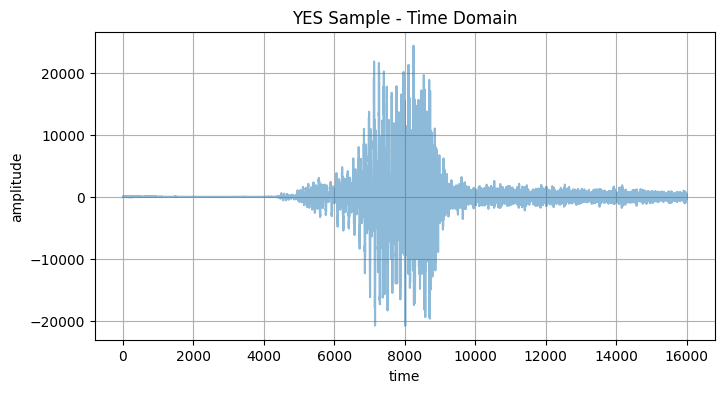

In [ ]:
plot_time(yes, figsize = (8,4), title='YES')

It is possible to analyse any datapoint from the dataset in the Studio. For that:
- From Edge Impulse Studio `Data Aquisition - Export Data` Tab, download to your computer a zip file with the .wav raw data captured.
- Upload to the `/content` folder one (or more) .wav samples
- load the sample with Librosa library

In [ ]:
# Load audio file
yes, sample_rate = librosa.load("yes.wav", sr=16000, duration=1.0)

### Plot the FFT

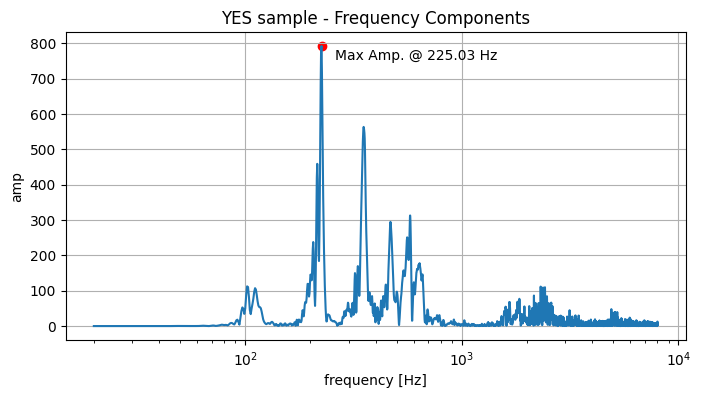

In [ ]:
yf_yes, max_amp_freq_yes = fft(yes, sample_rate, figsize = (8,4), title = 'YES')

### Plot Spectogram

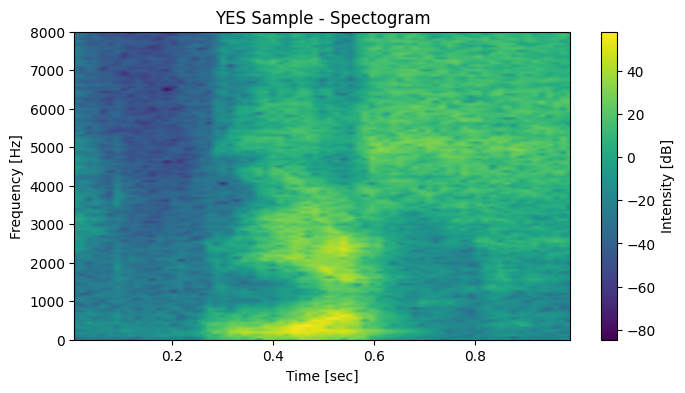

In [ ]:
plot_spectogram(yes, sample_rate, figsize = (8,4), title='YES')

### MFCC Plot with Librosa

Librosa function is designed to handle the entire MFCC extraction process starting from the raw audio signal.

When you pass the raw audio signal to `librosa.feature.mfcc`, the function internally performs several steps including:

1. Framing the signal into overlapping frames.
2. Applying a window function to each frame.
3. Calculating the FFT to convert each frame to the frequency domain.
4. Applying Mel filter banks to the frequency spectra.
5. Taking the logarithm of the Mel frequencies.
6. Performing the Discrete Cosine Transform (DCT).


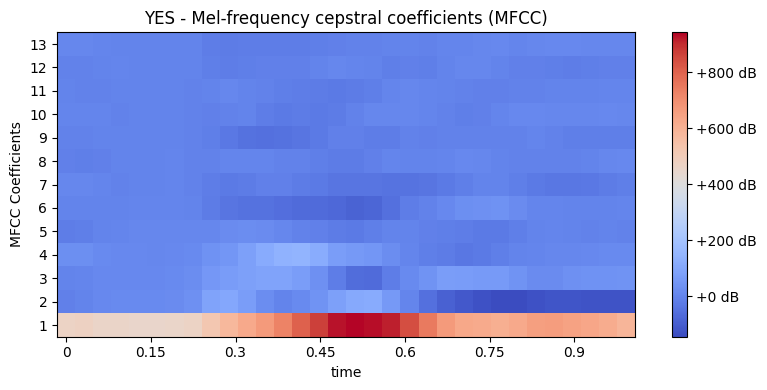

In [ ]:
calc_plot_mfcc (yes, sample_rate, n_mfcc=13, figsize = (8,4), title='YES')

The above plot was generated with the default Librosa MFCC package parameters.

# Generating MFCC Features

We will use the same parameters generated bt the `Studio Autotuning tool`.

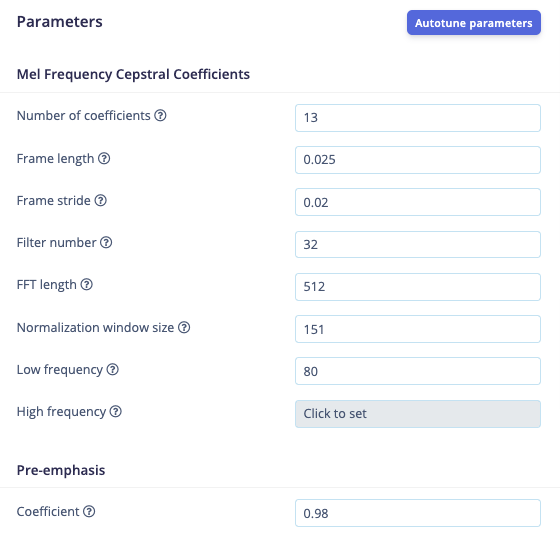

## MFCC Calculation and plot using numpy and scipy libraries

**Reading the audio file**

In [ ]:
audio = yes.copy()
type(audio)

numpy.ndarray

**Pre-emphasis**: Apply a pre-emphasis filter to high-pass filter the audio signal:

In [ ]:
alpha = 0.98 #Coefficient
audio = np.append(audio[0], audio[1:] - alpha * audio[:-1])

**Framing**: Split the signal using `frame lenght` of 25 milliseconds with a `Frame stride` of 20 milliseconds:

In [ ]:
# Parameters
frame_size = 0.025  # frame size in seconds
frame_stride = 0.020  # frame stride in seconds

# Calculate frame length and frame step (convert from seconds to samples)
frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate
frame_length = int(round(frame_length))
frame_step = int(round(frame_step))

# Calculate the total number of frames
num_frames = int(np.ceil(float(np.abs(len(audio) - frame_length)) / frame_step))

frame_length, frame_step, num_frames

(400, 320, 49)

In [ ]:
# Pad audio signal
pad_audio_length = num_frames * frame_step + frame_length
z = np.zeros((pad_audio_length - len(audio)))
pad_audio = np.append(audio, z)

In [ ]:
pad_audio.shape

(16080,)

In [ ]:
# Initialize the frames
indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
frames = pad_audio[indices.astype(np.int32, copy=False)]

In [ ]:
frames.shape

(49, 400)

**Windowing**: Apply a Hamming window to each frame:

In [ ]:
# Apply window function (Hamming)
frames *= np.hamming(frame_length)

In [ ]:
frames[0].shape

(400,)

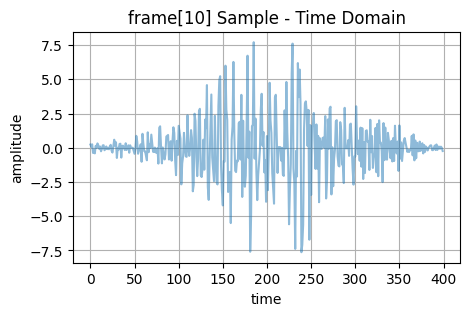

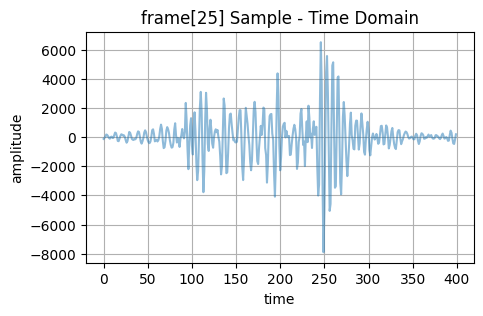

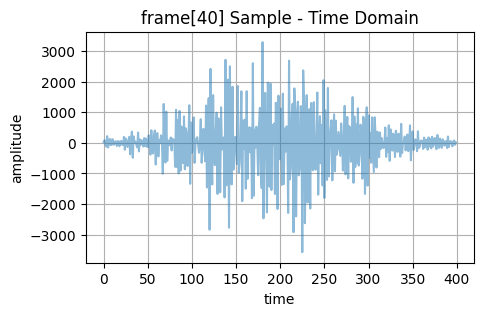

In [ ]:
plot_time(frames[10], figsize = (5,3), title='frame[10]')
plot_time(frames[25], figsize = (5,3), title='frame[25]')
plot_time(frames[40], figsize = (5,3), title='frame[40]')

**Fast Fourier Transform (FFT)**: Perform FFT to convert the frames to frequency domain:

In [ ]:
# Perform FFT and calculate power spectrum
NFFT = 512 # FFT lenght
mag_frames = np.absolute(fft.fft(frames, NFFT))
pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))

In [ ]:
mag_frames.shape, pow_frames.shape

((49, 512), (49, 512))

We should take only up to `(NFFT/2) + 1` elements after the FFT, as those are the unique frequency components for real-valued signals. And also update the pow_frames calculation.

In [ ]:
mag_frames = mag_frames[:, :NFFT//2 + 1]
pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))

In [ ]:
mag_frames.shape, pow_frames.shape

((49, 257), (49, 257))

In [ ]:
def plot_frame_fft(data, figsize=(5,3), title=''):
    plt.figure(figsize=figsize)
    plt.plot(data)
    plt.xlabel('FFT Lenght')
    plt.ylabel('power')
    plt.grid(True)
    plt.title(title+' sample - Frequency Components')
    plt.show();

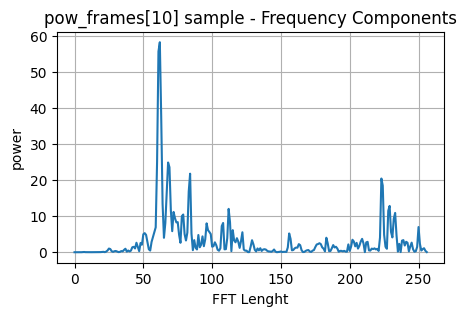

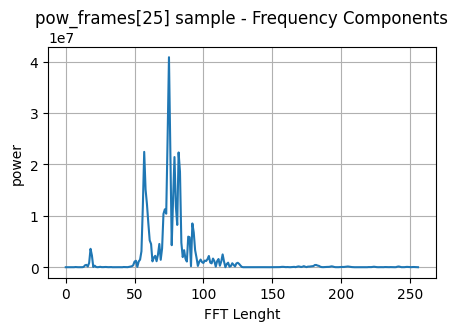

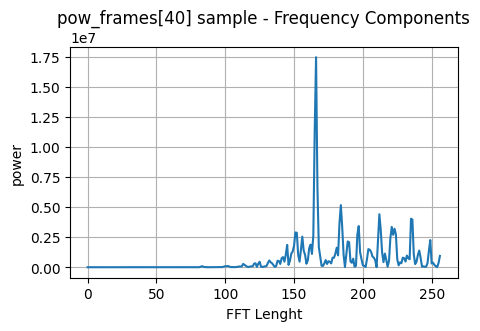

In [ ]:
plot_frame_fft(pow_frames[10], title = 'pow_frames[10]')
plot_frame_fft(pow_frames[25], title = 'pow_frames[25]')
plot_frame_fft(pow_frames[40], title = 'pow_frames[40]')

**Mel Filter Banks**: The frequency domain is then mapped to the Mel scale, which approximates the response of the human ear to different frequencies.

By setting low_freq_mel to the Mel equivalent of low_freq_cut (for ex. 80 Hz), we ensure that the lowest band edge of your Mel filter bank starts at that freq.

In [ ]:
low_freq_cut = 80
low_freq_mel = 2595 * np.log10(1 + low_freq_cut / 700.0)  # Convert Hz to Mel

In [ ]:
# Apply Mel filter banks
nfilt = 32
#low_freq_mel = 0
high_freq_mel = (2595 * np.log10(1 + (sample_rate / 2) / 700))  # Convert Hz to Mel
mel_points = np.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
bin = np.floor((NFFT + 1) * hz_points / sample_rate)

fbank = np.zeros((nfilt, int(np.floor(NFFT / 2 + 1))))
for m in range(1, nfilt + 1):
    f_m_minus = int(bin[m - 1])
    f_m = int(bin[m])
    f_m_plus = int(bin[m + 1])

    for k in range(f_m_minus, f_m):
        fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
    for k in range(f_m, f_m_plus):
        fbank[m - 1, k] = 1 - (k - bin[m]) / (bin[m + 1] - bin[m])

filter_banks = np.dot(pow_frames, fbank.T)
filter_banks = np.where(filter_banks == 0, np.finfo(float).eps, filter_banks)
filter_banks = 20 * np.log10(filter_banks)  # dB

In [ ]:
filter_banks.shape

(49, 32)

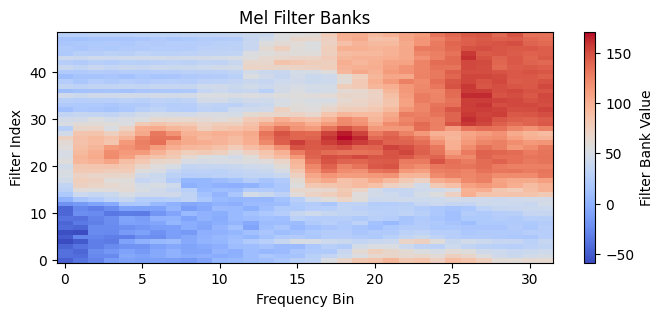

In [ ]:
# Plotting the filter bank matrix
plt.figure(figsize=(8,3))
plt.imshow(filter_banks, aspect='auto', cmap='coolwarm', origin='lower')
plt.colorbar(label='Filter Bank Value')
plt.xlabel('Frequency Bin')
plt.ylabel('Filter Index')
plt.title('Mel Filter Banks')
plt.show()

**Normalization**:

In [ ]:
noise_floor_dB = -52  # Replace with your specific noise floor level in dB

# Apply the noise floor
filter_banks = np.where(filter_banks < noise_floor_dB, noise_floor_dB, filter_banks)

# Optional: Normalize the Mel Filterbank Energies
mean = np.mean(filter_banks, axis=0)
std_dev = np.std(filter_banks, axis=0)
std_dev[std_dev == 0] = 1e-10

filter_banks -= mean
filter_banks /= std_dev

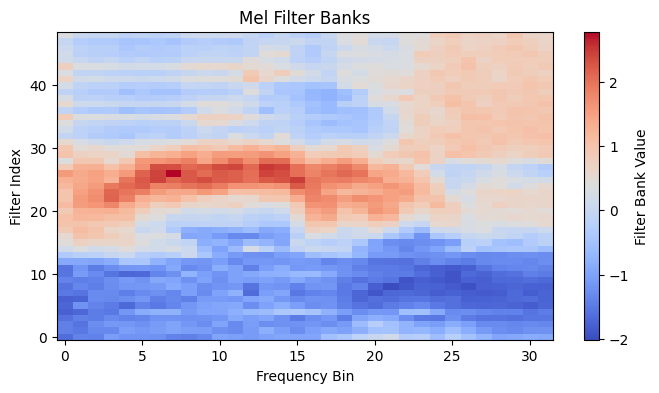

In [ ]:
# Plotting the filter bank matrix
plt.figure(figsize=(8,4))
plt.imshow(filter_banks, aspect='auto', cmap='coolwarm', origin='lower')
plt.colorbar(label='Filter Bank Value')
plt.xlabel('Frequency Bin')
plt.ylabel('Filter Index')
plt.title('Mel Filter Banks')
plt.show()

**Discrete Cosine Transform (DCT)**: The Mel frequencies are decorrelated and compressed, resulting in the final set of MFCCs.

In [ ]:
# Apply Discrete Cosine Transform (DCT)
num_ceps = 13
mfcc = dct(filter_banks, type=2, axis=-1, norm='ortho')[:, 1 : (num_ceps + 1)]  # Exclude 0th order coefficient (energy)

In [ ]:
mfcc.shape

(49, 13)

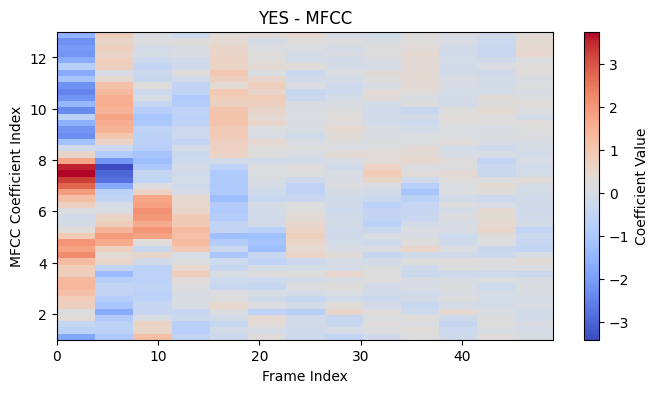

In [ ]:
# Plotting the MFCC
plt.figure(figsize=(8,4))
plt.imshow(mfcc, cmap='coolwarm', origin='lower', aspect='auto', extent=[0, 49, 1, 13])
plt.colorbar(label='Coefficient Value')
plt.xlabel('Frame Index')
plt.ylabel('MFCC Coefficient Index')
plt.title('YES - MFCC')
plt.show()


**Flatten the array** to create a list of 637 processed features

In [ ]:

processed_features = mfcc.flatten()
processed_features = np.round(processed_features, 4)
processed_features = processed_features.tolist()
len(processed_features)

637

In [ ]:
processed_features[:10]

[-1.8187,
 -0.9484,
 1.1691,
 -0.5349,
 -0.2881,
 0.2017,
 -0.253,
 -0.5174,
 -0.1783,
 0.1428]

## Using a function to calc, save and plot mfcc features

In [ ]:
 def calc_plot_mfcc_features(audio,
                             sample_rate,
                             alpha = 0.97,
                             NFFT=512,
                             low_freq_cut=80,
                             nfilt=40,
                             noise_floor_dB=-52,
                             frame_size=0.02,
                             frame_stride=0.02,
                             num_ceps=13,
                             figsize=(10, 5),
                             title= 'YES'
                             ):

    # Pre-emphasis
    audio = np.append(audio[0], audio[1:] - alpha * audio[:-1])

    # Calculate frame length and frame step (convert from seconds to samples)
    frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate
    frame_length = int(round(frame_length))
    frame_step = int(round(frame_step))

    # Calculate the total number of frames
    num_frames = int(np.ceil(float(np.abs(len(audio) - frame_length)) / frame_step))

    # Pad audio signal
    pad_audio_length = num_frames * frame_step + frame_length
    z = np.zeros((pad_audio_length - len(audio)))
    pad_audio = np.append(audio, z)

    # Initialize the frames
    indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
    frames = pad_audio[indices.astype(np.int32, copy=False)]

    # Apply window function (Hamming)
    frames *= np.hamming(frame_length)

    # Perform FFT and calculate power spectrum
    mag_frames = np.absolute(fft.fft(frames, NFFT))
    pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))

    # Take only up to (NFFT/2) + 1 elements after the FFT,
    # as those are the unique frequency components for real-valued signals.
    mag_frames = mag_frames[:, :NFFT//2 + 1]
    pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))

    # By setting low_freq_mel to the Mel equivalent of low_freq_cut (for ex. 80 Hz),
    # we ensure that the lowest band edge of your Mel filter bank starts at that freq.
    low_freq_mel = 2595 * np.log10(1 + low_freq_cut / 700.0)  # Convert Hz to Mel

    # Apply Mel filter banks
    high_freq_mel = (2595 * np.log10(1 + (sample_rate / 2) / 700))  # Convert Hz to Mel
    mel_points = np.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
    hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
    bin = np.floor((NFFT + 1) * hz_points / sample_rate)

    fbank = np.zeros((nfilt, int(np.floor(NFFT / 2 + 1))))
    for m in range(1, nfilt + 1):
        f_m_minus = int(bin[m - 1])
        f_m = int(bin[m])
        f_m_plus = int(bin[m + 1])

        for k in range(f_m_minus, f_m):
            fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
        for k in range(f_m, f_m_plus):
            fbank[m - 1, k] = 1 - (k - bin[m]) / (bin[m + 1] - bin[m])

    filter_banks = np.dot(pow_frames, fbank.T)
    filter_banks = np.where(filter_banks == 0, np.finfo(float).eps, filter_banks)
    filter_banks = 20 * np.log10(filter_banks)  # dB

    # Apply the noise floor
    filter_banks = np.where(filter_banks < noise_floor_dB, noise_floor_dB, filter_banks)

    # Normalize the Mel Filterbank Energies
    mean = np.mean(filter_banks, axis=0)
    std_dev = np.std(filter_banks, axis=0)
    std_dev[std_dev == 0] = 1e-10
    filter_banks -= mean
    filter_banks /= std_dev

    # Apply Discrete Cosine Transform (DCT)
    mfcc = dct(filter_banks,
            type=2,
            axis=-1,
            norm='ortho')[:, 1 : (num_ceps + 1)]  # Exclude 0th order coefficient (energy)

    # create a list of processed features
    processed_features = mfcc.flatten()
    processed_features = np.round(processed_features, 4)
    processed_features = processed_features.tolist()

    # Plotting the filter bank matrix
    plt.figure(figsize=figsize)
    plt.imshow(filter_banks, aspect='auto', cmap='coolwarm', origin='lower')
    plt.colorbar(label='Filter Bank Value')
    plt.xlabel('Frequency Bin')
    plt.ylabel('Filter Index')
    plt.title(title+' - Mel Filter Banks')

    # Plotting the MFCC
    plt.figure(figsize=figsize)
    plt.imshow(mfcc, cmap='coolwarm', origin='lower', aspect='auto', extent=[0, 49, 1, 13])
    plt.colorbar(label='Coefficient Value')
    plt.xlabel('Frame Index')
    plt.ylabel('MFCC Coefficient Index')
    plt.title(title+' - MFCC')
    plt.show()

    return processed_features


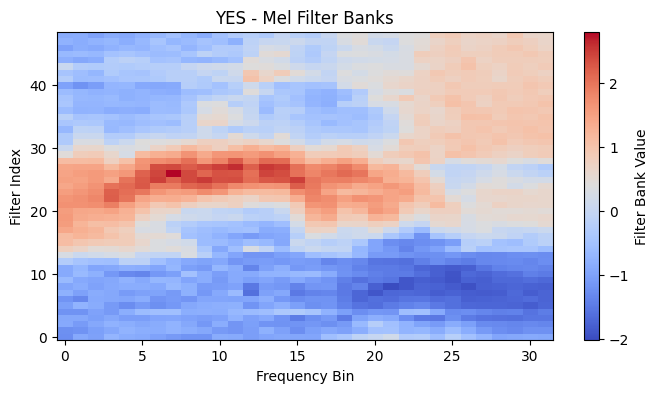

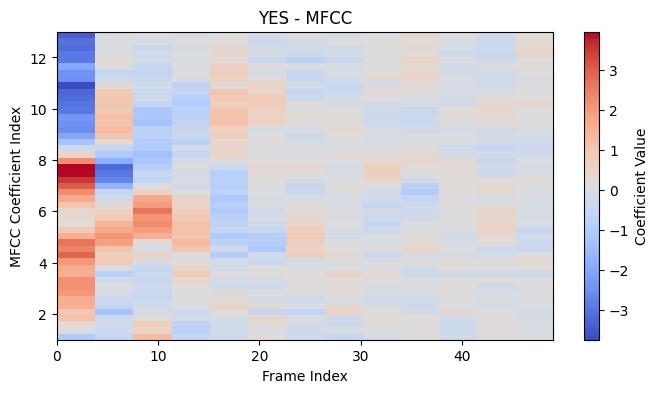

In [ ]:
processed_features = calc_plot_mfcc_features(yes,
                        sample_rate,
                        alpha = 0.97,
                        NFFT=512,
                        low_freq_cut=80,
                        nfilt=32,
                        noise_floor_dB=-52,
                        frame_size=0.025,
                        frame_stride=0.02,
                        num_ceps = 13,
                        figsize = (8,4),
                        title= 'YES'
                             )

In [ ]:
processed_features[:10]

[-1.0621,
 -0.545,
 1.2738,
 -0.5373,
 -0.2782,
 0.2214,
 -0.2266,
 -0.4973,
 -0.1696,
 0.135]